<a href="https://colab.research.google.com/github/wiltacca/Portfolio/blob/main/Classification_%26_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [167]:
# Install the necessary libraries:

!pip install feature-engine

In [168]:
# Import the required packages:

# For pandas and numpy.
import pandas as pd
import numpy as np

# For sklearn preprocessing.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

# For feature-engine impute missing data.
from feature_engine.imputation import RandomSampleImputer

# For Feature Engine transformation.
from feature_engine.transformation import LogTransformer, PowerTransformer, YeoJohnsonTransformer

# For Sklearn model selection.
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV

# For Sklearn pipeline.
from sklearn.pipeline import Pipeline

# For Sklearn models.
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.svm import SVR

# For Sklearn metrics.
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_roc_curve

# For Xgboost.
from xgboost import XGBClassifier 
from xgboost import XGBRegressor 

# For statsmodels
import statsmodels.api as sm

# For Math.
from math import sqrt

# Save and load model.
import joblib

# For ploting Visualisation.
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline 

# HR Analytics Classification Problems

## Load The Data

In [169]:
# Load the data.

url = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/hr_data.csv'

hr_df = pd.read_csv(url)

## Exploratory Data Analysis

In [170]:
# Get the first 5 rows.

hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,49017,7,7,1,0,1,1,35,5.0,3,1,0,50,1
1,58304,7,28,1,1,1,1,33,5.0,6,1,0,51,1
2,17673,7,4,2,1,0,1,50,4.0,17,1,0,47,1
3,77981,1,22,1,1,0,1,27,NaN,1,1,1,58,1
4,16502,7,22,1,1,1,1,27,NaN,1,0,0,61,1


In [171]:
# Perform exploratory analysis of the dataset.
# pandas.DataFrame.info prints a concise summary of a DataFrame.

hr_df.info() # NaN is regarded as float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   int64  
 2   region                9336 non-null   int64  
 3   education             9336 non-null   int64  
 4   gender                9336 non-null   int64  
 5   recruitment_channel   9336 non-null   int64  
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8657 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1021.2 KB


In [172]:
# Let view some basic statistical details like percentile, mean, std etc. of a dataframe.
# pandas.DataFrame.describe generates descriptive statistics.

hr_df.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,8657.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,39255.032669,5.009747,13.941838,1.277099,0.693873,0.476221,1.235433,34.652421,3.639367,5.818873,0.508462,0.067052,66.974400,0.500000
std,22673.196720,2.515557,9.968324,0.478811,0.460908,0.545196,0.572586,7.384614,1.209850,4.126219,0.499955,0.250126,14.559774,0.500027
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
25%,19573.000000,4.000000,4.000000,1.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,39438.000000,5.000000,13.000000,1.000000,1.000000,0.000000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,64.000000,0.500000
75%,59172.000000,7.000000,22.000000,2.000000,1.000000,1.000000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,80.000000,1.000000
max,78292.000000,8.000000,34.000000,2.000000,1.000000,2.000000,8.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


In [173]:
# Find out how many samples in the dataset is promoted and how many are not to detect imbalanced dataset.
# pandas.DataFrame.value_counts returns a Series containing counts of unique rows in the DataFrame.

hr_df['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [174]:
# Check shape (rows, columns) of dataframe.
# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

hr_df.shape

(9336, 14)

In [175]:
# Check size of dataframe which is rows X columns.
# pandas.DataFrame.size returns the number of rows if Series. 
# Otherwise return the number of rows times number of columns if DataFrame.

hr_df.size

130704

In [176]:
# Check dimension of dataframe.
# pandas.DataFrame.ndim returns 1 if Series. Otherwise return 2 if DataFrame.

hr_df.ndim

2

## Data Preprocessing

### Missing Values

In [177]:
# Inspect the percentage of missing values in each variable in ascending order.

hr_df.isnull().mean().sort_values(ascending=True)

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
previous_year_rating    0.072729
dtype: float64

In [178]:
# Inspect the total number of missing values in each variable in ascending order.

hr_df.isnull().sum().sort_values(ascending=True)

employee_id               0
department                0
region                    0
education                 0
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
previous_year_rating    679
dtype: int64

### Handling Missing Values

In [179]:
# Replace all null values in the previous_year_rating column with the mean value.
# pandas.DataFrame.fillna fills NA/NaN values using the specified method.

hr_df['previous_year_rating'] = hr_df['previous_year_rating'].fillna(hr_df['previous_year_rating'].mean())

# Cast a pandas object to a specified dtype.

hr_df['previous_year_rating'] = hr_df['previous_year_rating'].astype(int)

# Check for null values in one column.

hr_df['previous_year_rating'].isnull().any()

False


### Rename Columns To Remove % And ? Characters

In [180]:
# Rename columns using a dictionary mapping

hr_df.rename(columns=({ 'KPIs_met >80%': 'KPIs_met_more_than_80PC', 'awards_won?': 'awards_won'}), inplace=True,)

# Get the first 5 rows to view the changes.

hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80PC,awards_won,avg_training_score,is_promoted
0,49017,7,7,1,0,1,1,35,5,3,1,0,50,1
1,58304,7,28,1,1,1,1,33,5,6,1,0,51,1
2,17673,7,4,2,1,0,1,50,4,17,1,0,47,1
3,77981,1,22,1,1,0,1,27,3,1,1,1,58,1
4,16502,7,22,1,1,1,1,27,3,1,0,0,61,1


## Drop Features

In [181]:
# Remove a subset of input feature that are irrelevant to the target variable.

# pandas.DataFrame.drop drops specified labels from rows or columns.
# axis{0 or ‘index’, 1 or ‘columns’}, default 0.

hr_df.drop(['employee_id'], axis=1, inplace=True)

### Determining Cardinality

In [182]:
# The following command we can learn the cardinality of each of the loaded variables.

# pandas.DataFrame.nunique count distinct observations over requested axis.
# It returns Series with number of distinct observations. Can ignore NaN values.

hr_df.nunique().sort_values(ascending=True)

# Note: The output of preceding code shows the number of distinct categories per variable, that is, the cardinality.

gender                      2
KPIs_met_more_than_80PC     2
awards_won                  2
is_promoted                 2
education                   3
recruitment_channel         3
previous_year_rating        5
no_of_trainings             8
department                  9
length_of_service          33
region                     34
age                        41
avg_training_score         60
dtype: int64

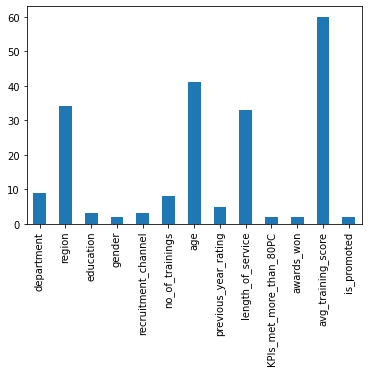

In [183]:
# Visualise the cardinality in a bar plot.

hr_df.nunique().plot(kind='bar')

### Comparing Feature Magnitude

In [184]:
# Many machine learning algorithms are sensitive to the scale of the features.
# Also, features with bigger value ranges tend to dominate over features with smaller ranges. 
# Having features within a similar scale also helps algorithms converge faster, thus 
# improving performance and training times.

# Let calculate the value range of each variable, that is, the difference between the maximum and minimum value.

(hr_df.max() - hr_df.min()).sort_values(ascending=True)

# Note: The value ranges of the variables are quite different.
# We wil use feature scaling to resolve the feature magnitude's problem!

gender                      1
KPIs_met_more_than_80PC     1
awards_won                  1
is_promoted                 1
education                   2
recruitment_channel         2
previous_year_rating        4
no_of_trainings             7
department                  8
region                     33
length_of_service          33
age                        40
avg_training_score         59
dtype: int64

### Correlation Between Two Features

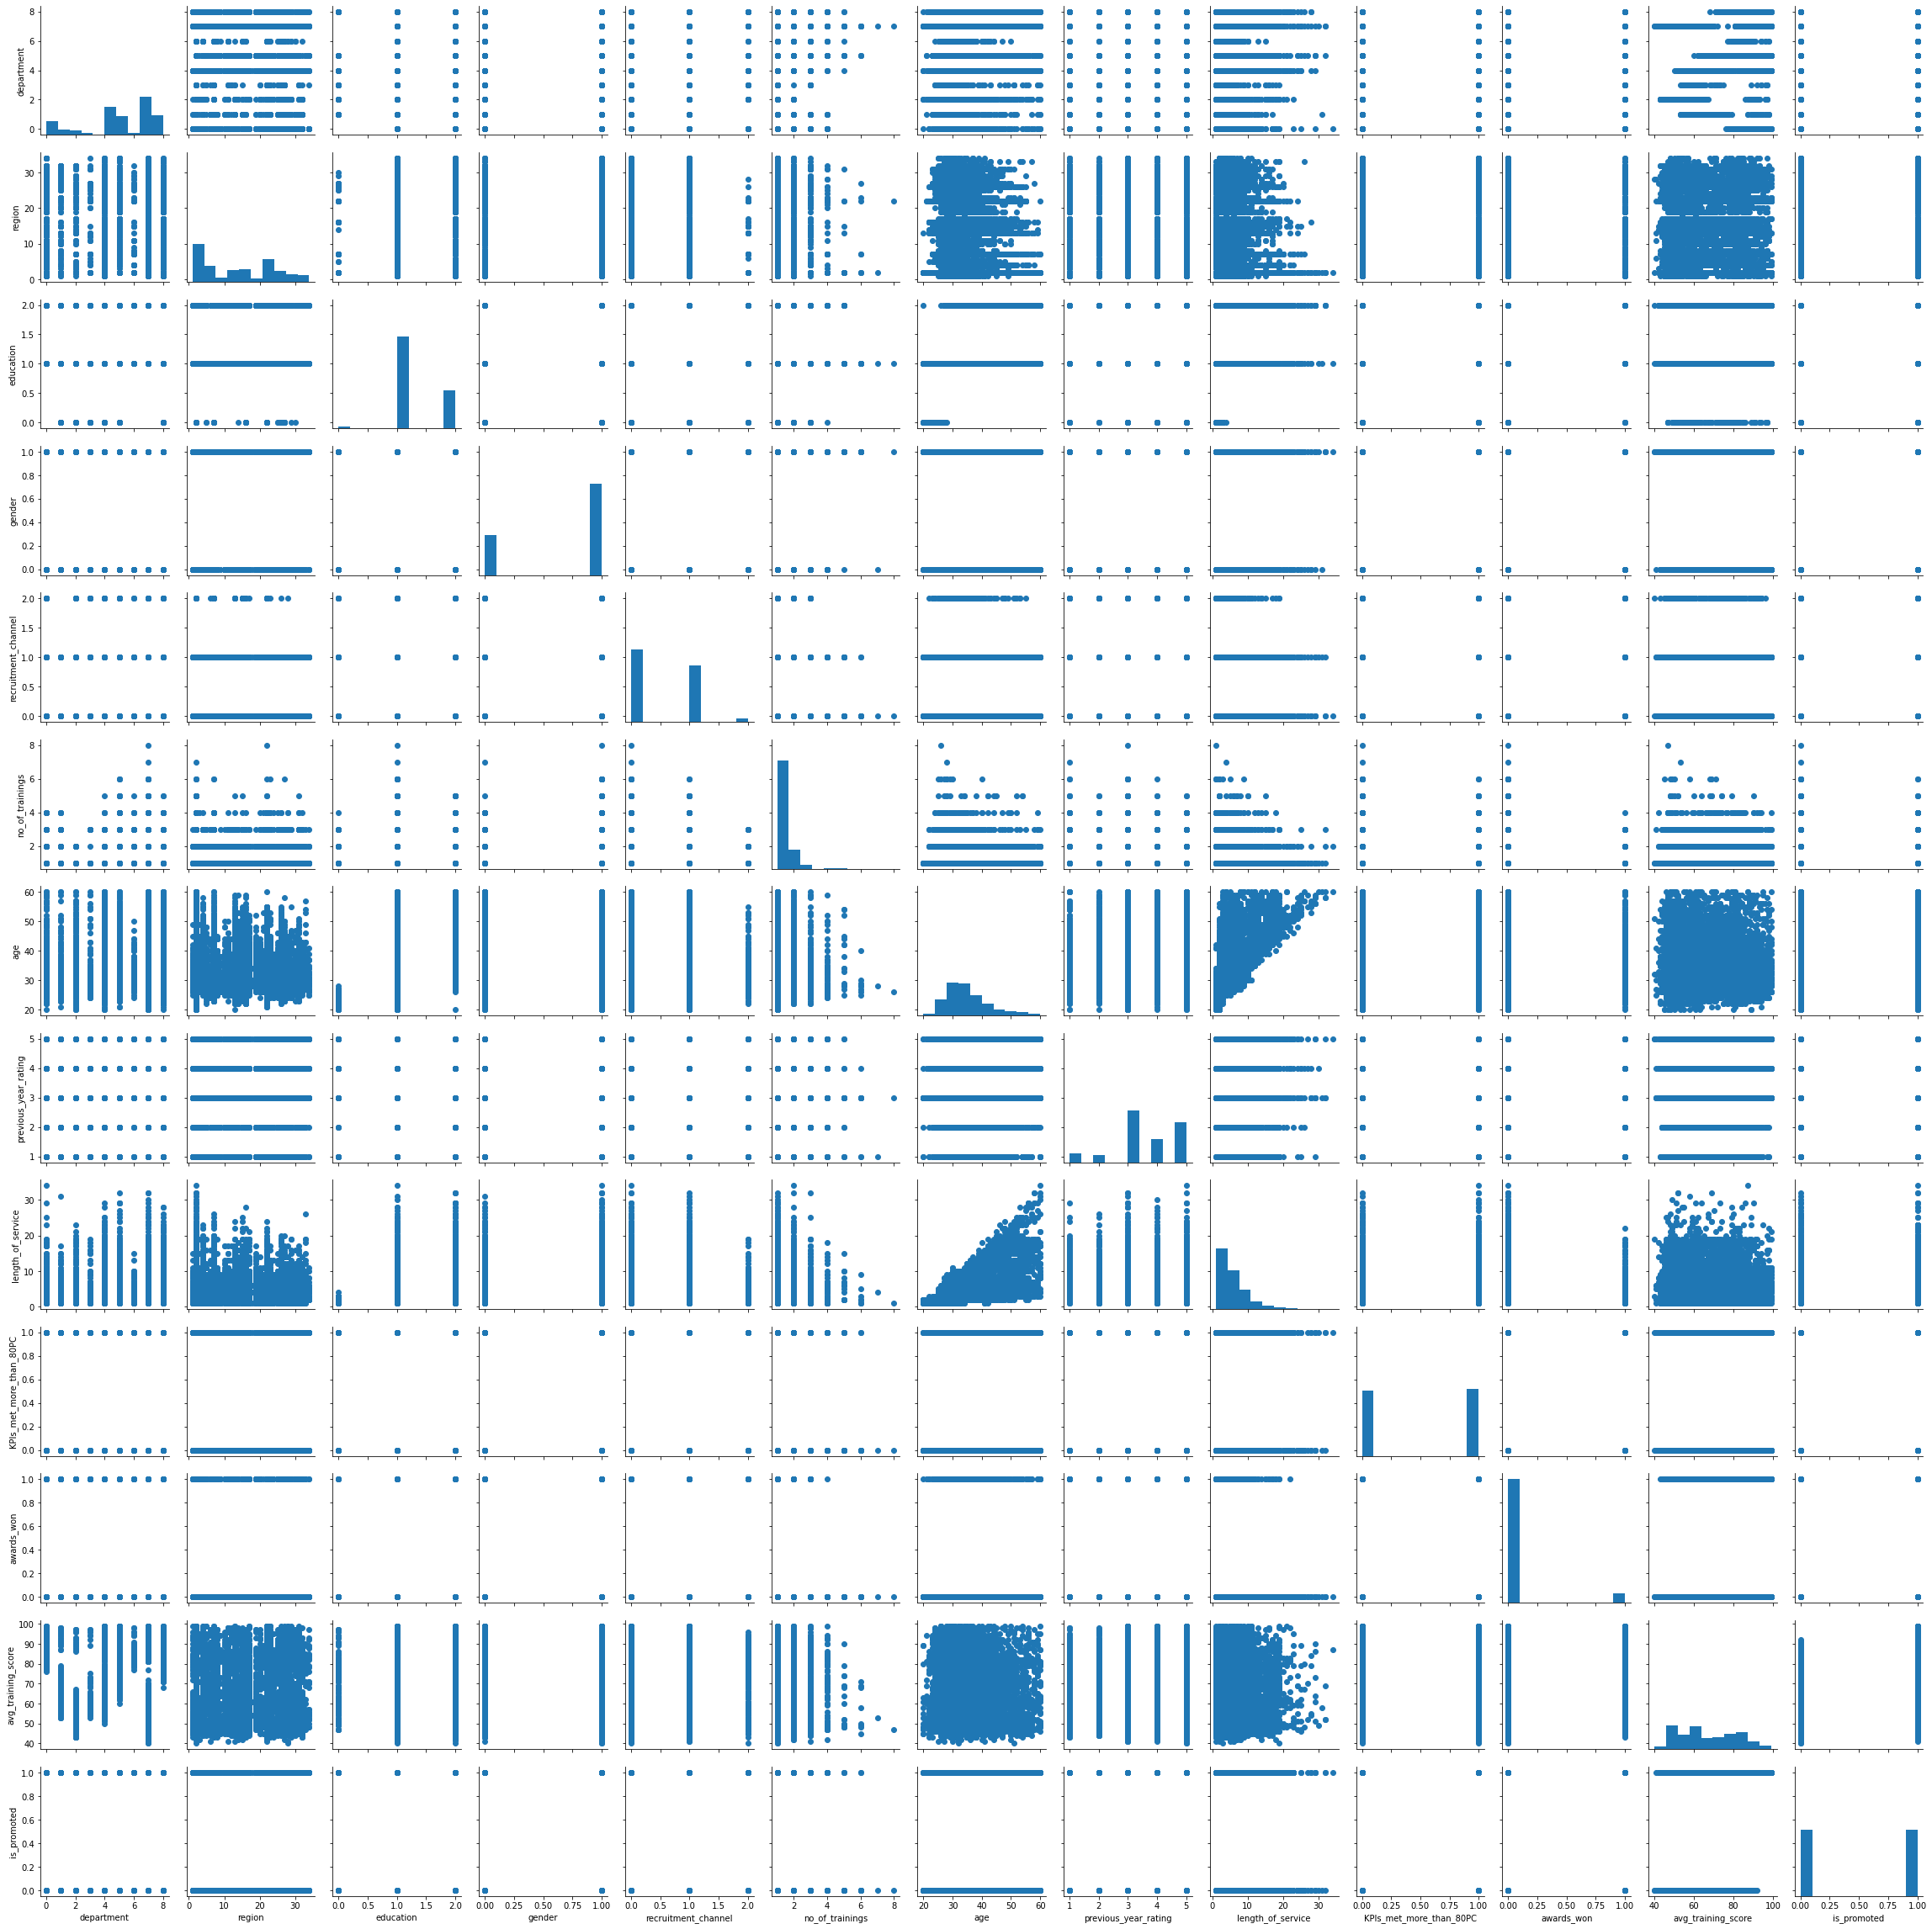

In [185]:
# Inspect the correlation visually by plotting the scatter plots as well as histograms.

# PairGrid object with hue.

graph = sns.PairGrid(hr_df) 

# Type of graph for diagonal. 

graph = graph.map_diag(plt.hist) 

# Type of graph for non-diagonal.

graph = graph.map_offdiag(plt.scatter) 

# Show the plot.

plt.show() 

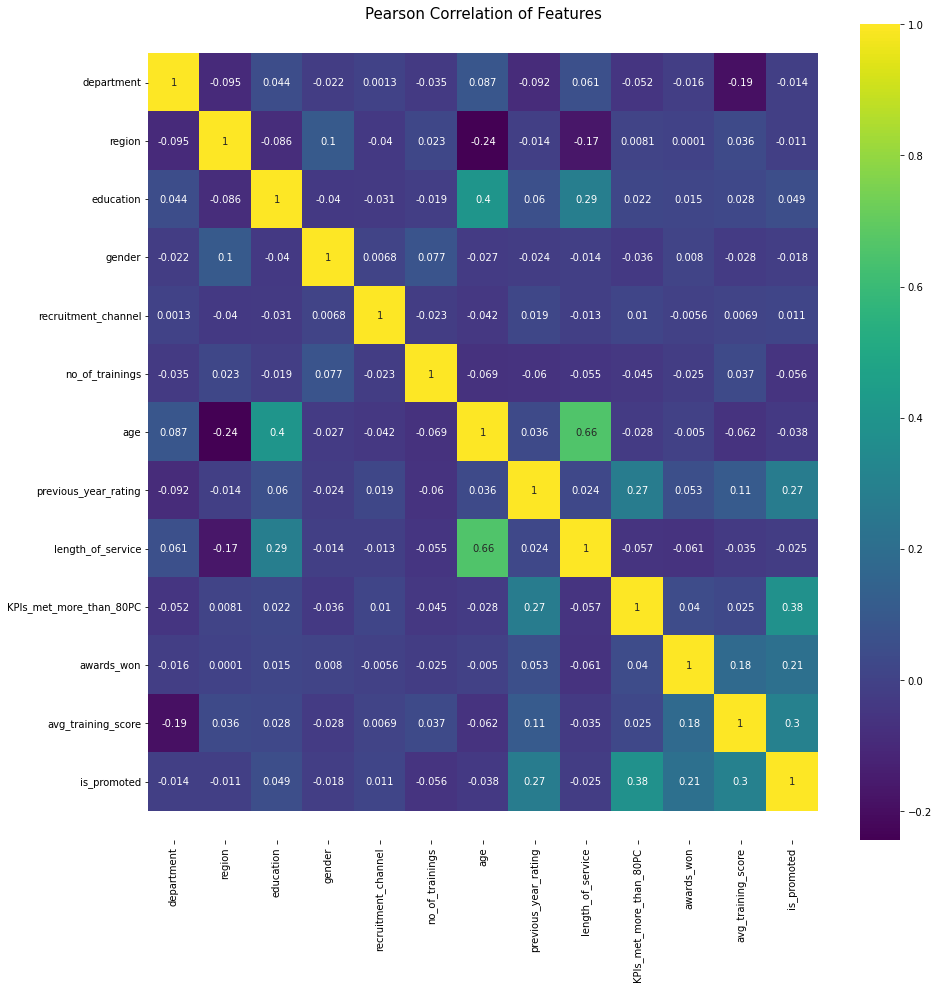

In [186]:
# Use heatmap to visualize the correlation between any two features / variables.

colormap = plt.cm.viridis # Creating colormaps

plt.figure(figsize=(15,15))

plt.title('Pearson Correlation of Features', size=15) # add title

# seaborn.heatmap plots rectangular data as a color-encoded matrix.

# data : rectangular dataset
# 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, 
# the index/column information will be used to label the columns and rows.

# vmin, vmax : floats, optional
# Values to anchor the colormap, otherwise they are inferred from the data 
# and other keyword arguments.

# cmap : matplotlib colormap name or object, or list of colors, optional
# The mapping from data values to color space. If not provided, the default will depend on 
# whether center is set.

# annot : bool or rectangular dataset, optional
# If True, write the data value in each cell. If an array-like with the same shape as data, 
# then use this to annotate the heatmap instead of the data. 
# Note that DataFrames will match on position, not index.

ax = sns.heatmap(hr_df.corr(), cmap=colormap, annot=True)

# # set the ylim to bottom, top to avoid first and the last row is cut in halve!

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

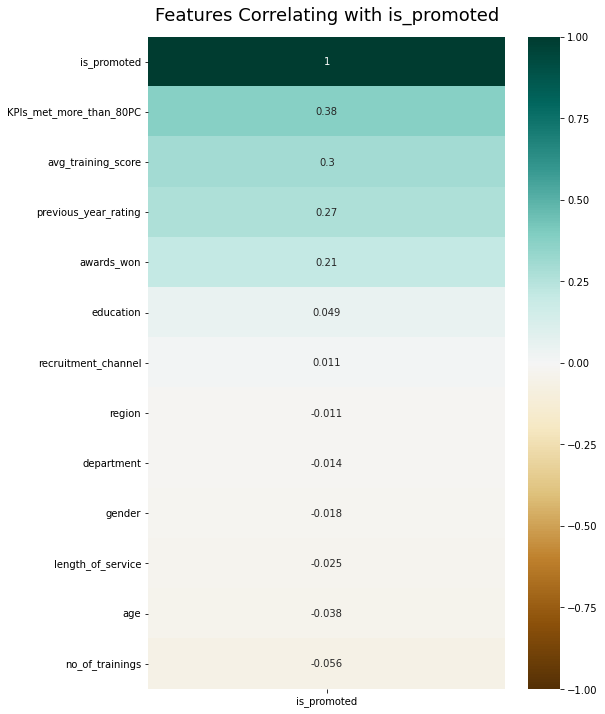

In [187]:
# Use heatmap to visualize the correlation all features with ‘is_promoted’, a single, dependent variable, 
# sorted by ‘Sale Price’ in a descending manner.

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(hr_df.corr()[['is_promoted']].sort_values(by='is_promoted', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

# To add title and adjust fontsize.

heatmap.set_title('Features Correlating with is_promoted', fontdict={'fontsize':18}, pad=16);

### Numerical Variables Distribution

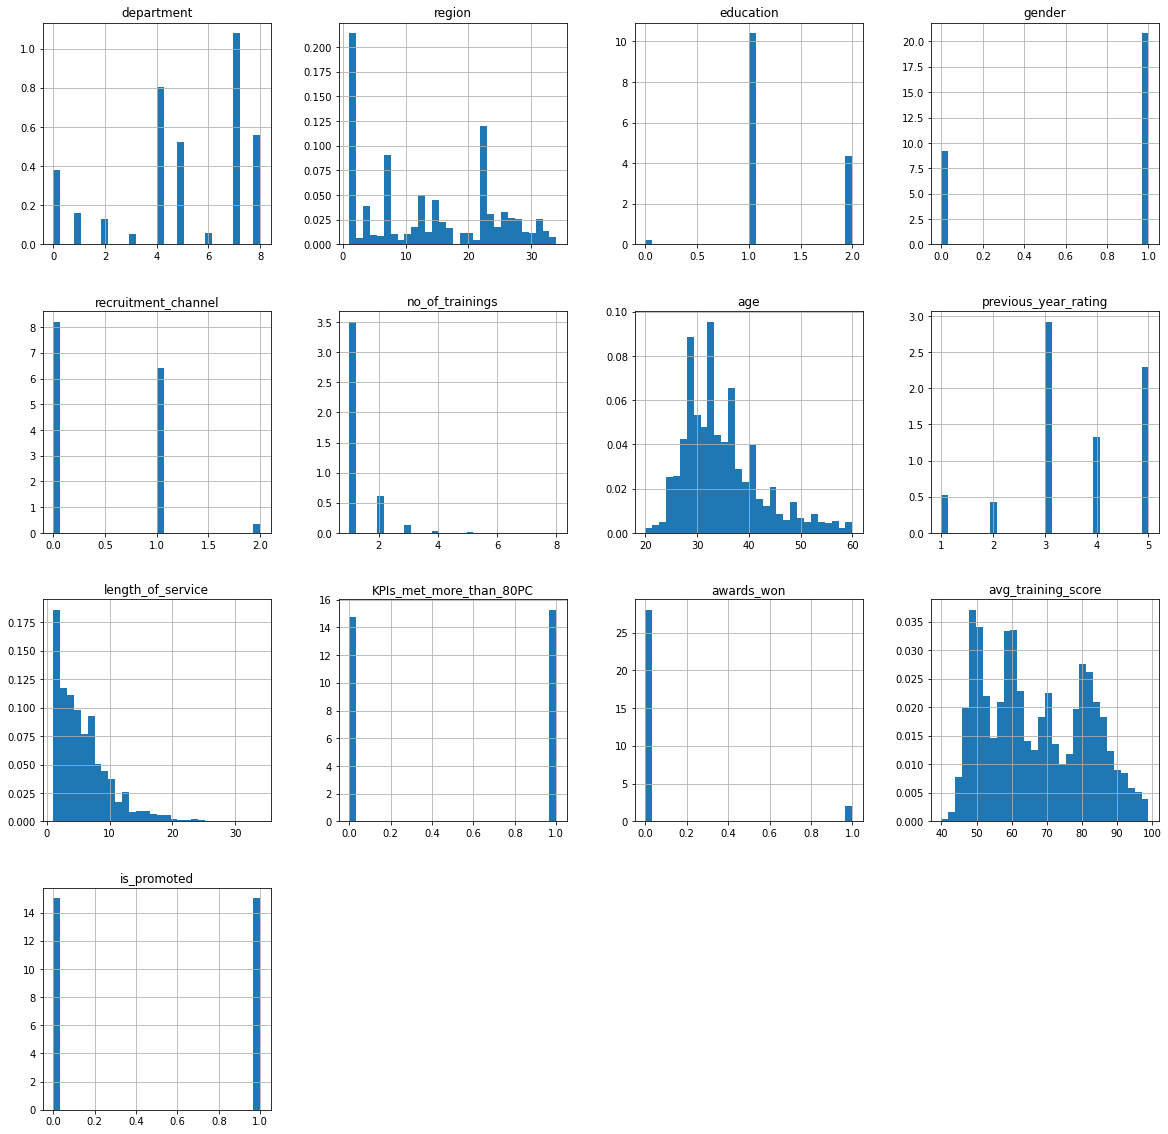

In [188]:
# Visualize the numerical variables' distribution with histograms.

# Some machine learning algorithms assumes that independent variables are normally distributed.

hr_df.hist(bins=30, figsize=(20,20), density=True) # entire dataframe.

plt.show()

# Note: All of numerical variables in dataset are skewed.

### Highlighting Outliers

![Screenshot%202021-12-05%20030948.png](attachment:Screenshot%202021-12-05%20030948.png)

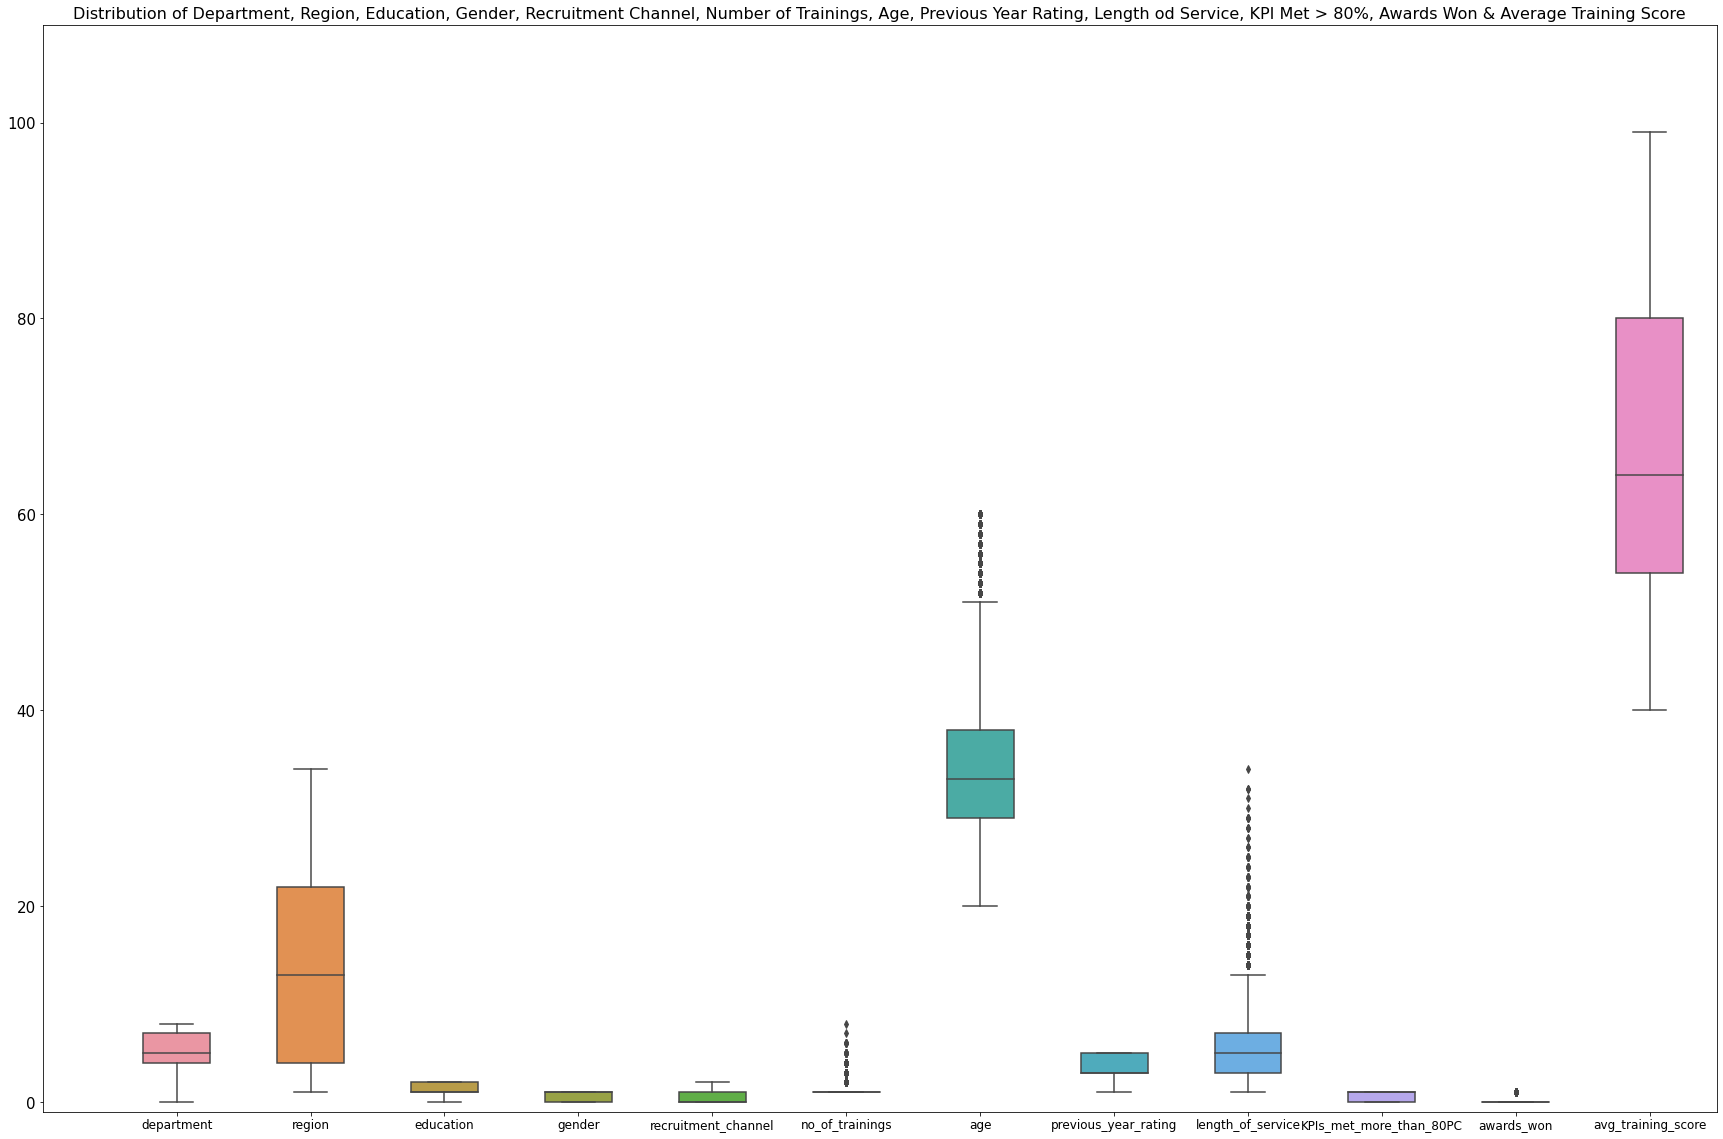

In [189]:
# Get numerical measures.

df_stats = hr_df[['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age',
                 'previous_year_rating', 'length_of_service', 'KPIs_met_more_than_80PC', 'awards_won', 'avg_training_score']]

# Set figure size.

plt.figure(figsize=(30,20))

# Create seaborn boxplot using df_stats.

sns.boxplot(data=df_stats, width=0.5)

# State title of plot and the axes labels.

plt.title('Distribution of Department, Region, Education, Gender, Recruitment Channel, Number of Trainings, Age, Previous Year Rating, Length od Service, KPI Met > 80%, Awards Won & Average Training Score'
          , fontsize=16)

# Set font size of ticks on the x-axis and y-axis.

plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

# Tweak x-axis and y-axis ranges using Matplotlib.

plt.ylim(-1, 110)
plt.xlim(-1, None)

# Display the plot.

plt.show()

Text(0.5, 1.0, 'Boxplot For age Variable')

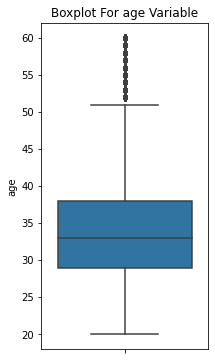

In [190]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the age variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=hr_df['age'])

# Add title.

plt.title('Boxplot For age Variable')

# Note: We can see that there are outliers.

Text(0.5, 1.0, 'Boxplot For length_of_service Variable')

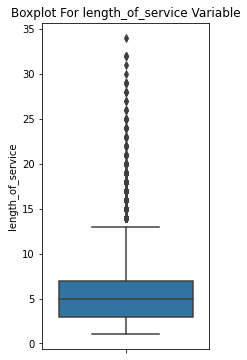

In [191]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the length_of_service variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=hr_df['length_of_service'])

# Add title.

plt.title('Boxplot For length_of_service Variable')

# Note: We can see that there are outliers.

## Data Cleansing And Transformation

### Trimming Outliers By Finding Boundaries Using Inter-Quartile Range Proximity Rule (IQR)

In [192]:
# Create a function to find boundaries of a variable distribution, using inter-quartile range proximity rule (IQR).

def find_boundaries(df, variable, distance):

    # Calculate the boundaries outside which sit the outliers for skewed distributions:

    # Distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate the boundaries.
    
    # pandas.DataFrame.quantile returns values at the given quantile over requested axis.
    # q : float or array-like, default 0.5 (50% quantile)
    # Value between 0 <= q <= 1, the quantile(s) to compute.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [193]:
# Determine the limits of the age variable.

age_upper_limit, age_lower_limit = find_boundaries(hr_df, 'age', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier.

age_upper_limit, age_lower_limit

(51.5, 15.5)

In [194]:
# Determine the limits of the length_of_service variable.

length_of_service_upper_limit, length_of_service_lower_limit = find_boundaries(hr_df, 'length_of_service', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier.

length_of_service_upper_limit, length_of_service_lower_limit

(13.0, -3.0)

In [195]:
# Let flag the outliers in the dataset for age variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_age = np.where(hr_df['age'] > age_upper_limit, True,
                    np.where(hr_df['age'] < age_lower_limit, True, False))

In [196]:
# Let flag the outliers in the dataset for length_of_service variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_length_of_service = np.where(hr_df['length_of_service'] > length_of_service_upper_limit, True,
                    np.where(hr_df['length_of_service'] < length_of_service_lower_limit, True, False))

In [197]:
# Create a new dataframe with the outlier values and trimm (remove) the dataset of outliers
# across multiple variables.

hr_df_trimmed = hr_df.loc[~(outliers_age + outliers_length_of_service), ]  # ~ NOT outliers

hr_df.shape, hr_df_trimmed.shape 

#  Original dataframe (total rows = 9336, total columns = 14)
# Trimmed dataframe (total rows = 8590, total columns = 14)

((9336, 13), (8590, 13))

Text(0.5, 1.0, 'Boxplot For age Variable')

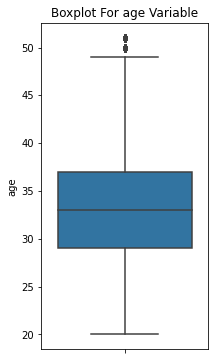

In [198]:
# Re-plot a boxplot for the age variable to check outliers again.

plt.figure(figsize=(3,6))
sns.boxplot(y=hr_df_trimmed['age'])

# Add title.

plt.title('Boxplot For age Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For length_of_service Variable')

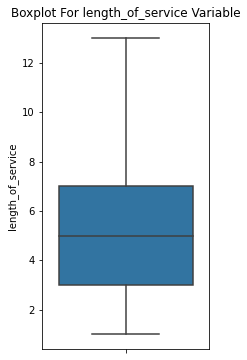

In [199]:
# Re-plot a boxplot for the length_of_service variable to check outliers again.

plt.figure(figsize=(3,6))
sns.boxplot(y=hr_df_trimmed['length_of_service'])

# Add title.

plt.title('Boxplot For length_of_service Variable')

# Note: We can see that all of the outliers are removed.

### Train And Test Split

In [200]:
# Separate the data into training (70%) and testing sets (30%).
# Target variable is is_promoted.

# axis = 0 is row & axis = 1 is column}, default 0 row.

X_train, X_test, y_train, y_test = train_test_split(
    hr_df_trimmed.drop('is_promoted', axis=1), hr_df_trimmed['is_promoted'], test_size=0.3, random_state=0)

# Note: Removed target variable used for prediction - NEVER include in training set!

# hr_df_trimmed.drop('is_promoted', axis=1) ---> X_train, X_test:
# X_train = 70% of independent variables use to train the model.
# X_test = 30% of independent variables use to make prediction to test model's accuracy.
# hr_df_trimmed['is_promoted'] ---> y_train, y_test:
# y_train = Dependent variable to be predicted by model (Which is category labels against independent variables).
# y_test = Category labels for test data to test accuracy between actual & predicted categories.

X_train.shape, X_test.shape # (total rows = 8590 , total columns = 12)

((6013, 12), (2577, 12))

### Feature Scaling 

In [201]:
# standardisation: with the StandardScaler from sklearn.
# sklearn.preprocessing.StandardScaler standardize feature by remove mean & scaling to unit variance.

# The standard score of a sample x is calculated as:
# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

# Set up the scaler transformer.

scaler = StandardScaler()

# Fit it to the train set so that it learns each variable's mean and standard deviation.

scaler.fit(X_train)

# Standardize (transform) the train and test sets with the trained scaler.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [202]:
# Scaler stores the mean of the features, learned from training set.

scaler.mean_

array([ 4.99534342, 14.4802927 ,  1.25943788,  0.69083652,  0.48445036,
        1.24264094, 33.31082654,  3.59371362,  5.04590055,  0.51771162,
        0.06934974, 67.23665392])

In [203]:
# Scaler stores the standard deviation deviation of the features, learned from training set.

scaler.scale_

array([ 2.55274867,  9.88662586,  0.47123774,  0.4621487 ,  0.55164   ,
        0.58488456,  5.68111622,  1.17519419,  2.88683771,  0.4996862 ,
        0.25404794, 14.71880814])

In [204]:
# Convert the returned NumPy arrays to dataframes.
# pandas.DataFrame creates two-dimensional, size-mutable, potentially heterogeneous tabular data.

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

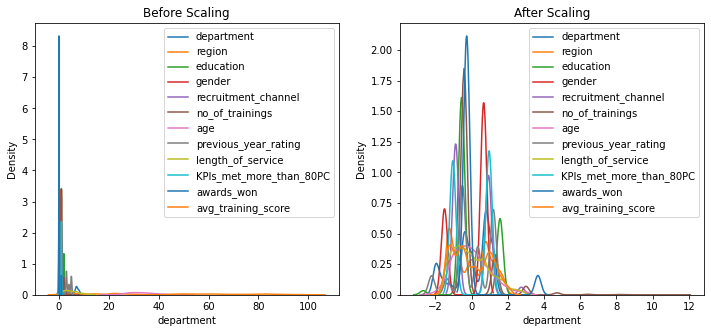

In [205]:
# Compare the variable distributions before and after scaling.
# seaborn.kdeplot plots univariate or bivariate distributions using kernel density estimation.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling.

ax1.set_title('Before Scaling')

sns.kdeplot(X_train['department'], ax=ax1, label ='department')
sns.kdeplot(X_train['region'], ax=ax1, label ='region')
sns.kdeplot(X_train['education'], ax=ax1, label ='education')
sns.kdeplot(X_train['gender'], ax=ax1, label ='gender')
sns.kdeplot(X_train['recruitment_channel'], ax=ax1, label ='recruitment_channel')
sns.kdeplot(X_train['no_of_trainings'], ax=ax1, label ='no_of_trainings')
sns.kdeplot(X_train['age'], ax=ax1, label ='age')
sns.kdeplot(X_train['previous_year_rating'], ax=ax1, label ='previous_year_rating')
sns.kdeplot(X_train['length_of_service'], ax=ax1, label ='length_of_service')
sns.kdeplot(X_train['KPIs_met_more_than_80PC'], ax=ax1, label ='KPIs_met_more_than_80PC')
sns.kdeplot(X_train['awards_won'], ax=ax1, label ='awards_won')
sns.kdeplot(X_train['avg_training_score'], ax=ax1, label ='avg_training_score')
ax1.legend()

# After scaling.

ax2.set_title('After Scaling')

sns.kdeplot(X_train_scaled['department'], ax=ax2, label ='department')
sns.kdeplot(X_train_scaled['region'], ax=ax2, label ='region')
sns.kdeplot(X_train_scaled['education'], ax=ax2, label ='education')
sns.kdeplot(X_train_scaled['gender'], ax=ax2, label ='gender')
sns.kdeplot(X_train_scaled['recruitment_channel'], ax=ax2, label ='recruitment_channel')
sns.kdeplot(X_train_scaled['no_of_trainings'], ax=ax2, label ='no_of_trainings')
sns.kdeplot(X_train_scaled['age'], ax=ax2, label ='age')
sns.kdeplot(X_train_scaled['previous_year_rating'], ax=ax2, label ='previous_year_rating')
sns.kdeplot(X_train_scaled['length_of_service'], ax=ax2, label ='length_of_service')
sns.kdeplot(X_train_scaled['KPIs_met_more_than_80PC'], ax=ax2, label ='KPIs_met_more_than_80PC')
sns.kdeplot(X_train_scaled['awards_won'], ax=ax2, label ='awards_won')
sns.kdeplot(X_train_scaled['avg_training_score'], ax=ax2, label ='avg_training_score')

ax2.legend()

# Display the plot.

plt.show()

## Build The Model(s) 1

### Model 1A: Logistic Regression - Baseline

sklearn.linear_model.LogisticRegression is a Logistic Regression (aka logit, MaxEnt) classifier [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [206]:
# Train a baseline Logistic Regression Model.

lg = LogisticRegression()

# Fit the model to the training set.

lg.fit(X_train_scaled, y_train)

LogisticRegression()

In [207]:
# Coefficient of the features in the decision function.

lg.coef_

array([[ 0.23338996, -0.06638848,  0.09598074,  0.03343145,  0.04170101,
        -0.11670911, -0.16437748,  0.4600988 ,  0.08968804,  0.84201098,
         0.51134714,  0.72900709]])

In [208]:
# Intercept (a.k.a. bias) added to the decision function.

lg.intercept_

array([0.06916331])

## Evaluate And Improve The Model(s) 1

#### Evaluate Model 1A Using Training Set

In [209]:
# Calculate the training accuracy.
# score(X, y[, sample_weight]) returns the mean accuracy on the given test data and labels.

train_acc = lg.score(X_train_scaled, y_train)

print('Training Accuracy: %.2f%%' % (train_acc*100))

Training Accuracy: 72.24%


In [210]:
# Calculate the fitted values for training set.

y_fitted = lg.predict(X_train_scaled) # returns 0 or 1 (y predict for training set)

# Inspect the fitted values for training set.

y_fitted

array([0, 1, 1, ..., 0, 0, 0])

#### Evaluate Model 1A Using Holdout Validation Approach

In [211]:
# Calculate the testing accuracy.

test_acc = lg.score(X_test_scaled, y_test)

print('Testing Accuracy: %.2f%%' % (test_acc*100))

Testing Accuracy: 70.35%


### Model 1B: Logistic Regression - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 1B Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [212]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lg', LogisticRegression())])

In [213]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score:', results['train_score'])
print('Testing_Score:', results['test_score'])

Training_Score: [0.72411642 0.72328482 0.72536383 0.71606735 0.72791519]
Testing_Score: [0.71737323 0.72485453 0.7123857  0.74625624 0.70881864]


The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [214]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

Cross Validation Training Accuracy:, 72.33%
Cross Validation Testing Accuracy:, 72.19%


As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split. 

### Confusion Matrix - Train Test Split

In [215]:
# Use the model to perform prediction on test data.

y_pred = lg.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1284
           1       0.70      0.70      0.70      1293

    accuracy                           0.70      2577
   macro avg       0.70      0.70      0.70      2577
weighted avg       0.70      0.70      0.70      2577



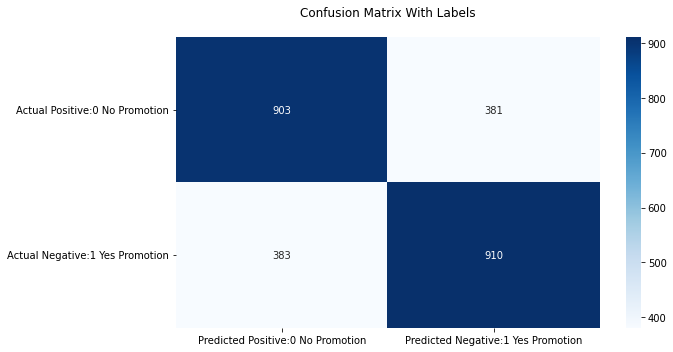

In [216]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


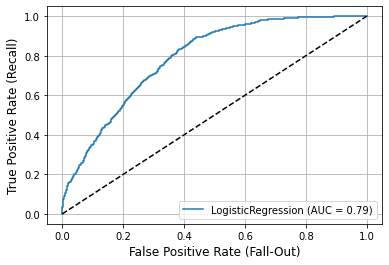

In [217]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(lg, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [218]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(lg, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1284
           1       0.70      0.70      0.70      1293

    accuracy                           0.70      2577
   macro avg       0.70      0.70      0.70      2577
weighted avg       0.70      0.70      0.70      2577



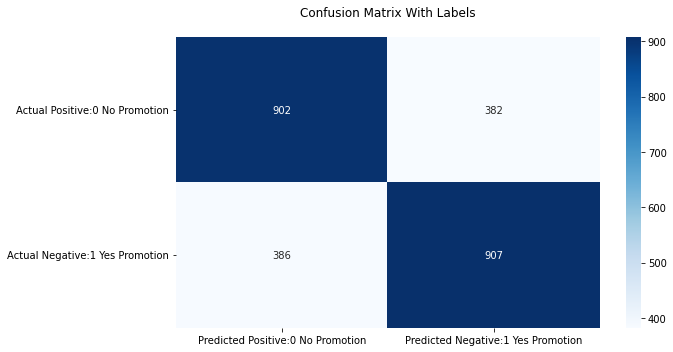

In [219]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Model 1C: Logistic Regression - Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

scoring : str, callable, list, tuple or dict, default=None    
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [220]:
# Determine hyperparameters to auto tune.

param_grid = {  'penalty' : ['l2', 'l1'], # Add penalty terms.
                'C' : [0.001, 0.002, 0.003, 0.00004], # Inverse of regularization strength; must be a positive float.
                'solver' : ['liblinear', 'saga'], # Algorithms to use in the optimization problem.
             'max_iter' : [100, 500, 1000, 2000]} # To make sure the model will converge.

In [221]:
# Perform Grid Search.

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled, y_train) # GridSearchCV uses training set to perform cross validation - avoid data leakage.

In [222]:
# Mean cross-validated score of the best_estimator.

print(gs.best_score_)

0.739232755604057


In [223]:
# Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

{'C': 4e-05, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [224]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024257,0.005013,0.005666,0.002935,0.001,100,l2,liblinear,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l2',...",0.717373,0.719867,0.714048,0.752912,0.710483,0.722937,0.015317,19
1,0.077022,0.013652,0.006676,0.004733,0.001,100,l2,saga,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l2',...",0.719036,0.721530,0.715711,0.752912,0.715474,0.724932,0.014168,13
2,0.023073,0.010551,0.010355,0.003886,0.001,100,l1,liblinear,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",0.492103,0.492103,0.492103,0.492512,0.492512,0.492267,0.000201,57
3,0.035160,0.012997,0.005789,0.003444,0.001,100,l1,saga,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",0.507897,0.507897,0.507897,0.507488,0.507488,0.507733,0.000201,49
4,0.024994,0.012029,0.004665,0.001899,0.001,500,l2,liblinear,"{'C': 0.001, 'max_iter': 500, 'penalty': 'l2',...",0.717373,0.719867,0.714048,0.752912,0.710483,0.722937,0.015317,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.009110,0.001500,0.007077,0.008565,0.00004,1000,l1,saga,"{'C': 4e-05, 'max_iter': 1000, 'penalty': 'l1'...",0.492103,0.507897,0.507897,0.507488,0.492512,0.501579,0.007573,54
60,0.020897,0.005017,0.005477,0.003753,0.00004,2000,l2,liblinear,"{'C': 4e-05, 'max_iter': 2000, 'penalty': 'l2'...",0.713217,0.714048,0.716542,0.752912,0.712146,0.721773,0.015637,29
61,0.052916,0.026445,0.007213,0.002882,0.00004,2000,l2,saga,"{'C': 4e-05, 'max_iter': 2000, 'penalty': 'l2'...",0.734830,0.739817,0.736492,0.747920,0.736273,0.739066,0.004719,2
62,0.027461,0.017785,0.006426,0.002933,0.00004,2000,l1,liblinear,"{'C': 4e-05, 'max_iter': 2000, 'penalty': 'l1'...",0.492103,0.492103,0.492103,0.492512,0.492512,0.492267,0.000201,57


In [225]:
# Train the Logistic Regression Model based on best parameters.

lg1 = LogisticRegression(penalty='l2', # Specify the norm of the penalty.
                         C=4e-05, # Inverse of regularization strength; must be a positive float.
                         random_state=1, # Set the random state to obtain the same results every time.
                        solver='saga',  # Optimization algorithm used for logistic regression for small datasets.
                         max_iter=100 # To make sure the model will converge.
                        ) 

# Fit the model to the training set.

lg1.fit(X_train_scaled,y_train)

LogisticRegression(C=4e-05, random_state=1, solver='saga')

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [226]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lg1', LogisticRegression(penalty='l2', C=4e-05, random_state=1, solver='saga', 
                                                max_iter=100 ))])

In [227]:
print('---Improved Model 1C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (lg1.score(X_train_scaled, y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (lg1.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

---Improved Model 1C---
Train Test Split Training Accuracy:, 74.51%
Train Test Split Testing Accuracy:, 73.19%
Cross Validation Training Accuracy:, 73.87%
Cross Validation Testing Accuracy:, 73.91%


### Confusion Matrix - Train Test Split

In [228]:
# Use the model to perform prediction on test data.

y_pred = lg1.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.60      0.69      1284
           1       0.68      0.87      0.76      1293

    accuracy                           0.73      2577
   macro avg       0.75      0.73      0.73      2577
weighted avg       0.75      0.73      0.73      2577



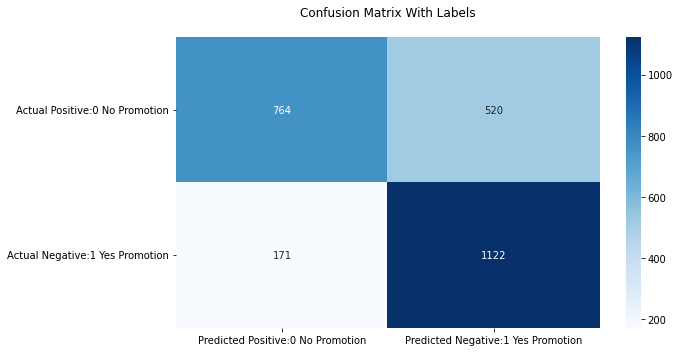

In [229]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


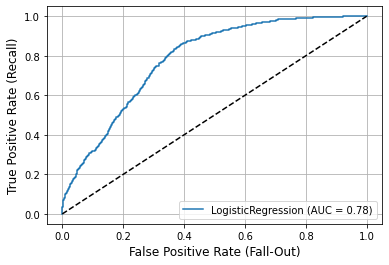

In [230]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(lg1, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [231]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(lg1, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1284
           1       0.70      0.82      0.75      1293

    accuracy                           0.73      2577
   macro avg       0.74      0.73      0.73      2577
weighted avg       0.74      0.73      0.73      2577



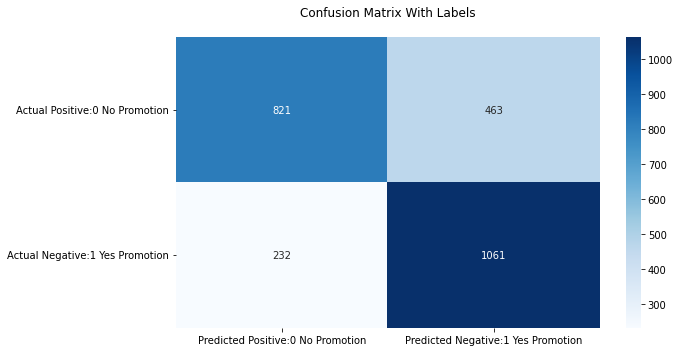

In [232]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Build The Model(s) 2

### Model 2A: Decision Tree Classifier - Baseline


tree.DecisionTreeClassifier is decision tree classifier. [LInk](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

max_depth : int, default=None       
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [233]:
# Create a baseline  Decision Tree Model.

decision_tree = tree.DecisionTreeClassifier(max_depth = 2)

# Build a decision tree classifier from the training set.

decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=2)

tree.plot_tree plot a decision tree. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

decision_tree : decision tree regressor or classifier  
The decision tree to be plotted.

feature_names : list of strings, default=None   
Names of each of the features. If None, generic names will be used (“X[0]”, “X[1]”, …).

class_names : list of str or bool, default=None   
Names of each of the target classes in ascending numerical order. Only relevant for classification and not supported for multi-output. If True, shows a symbolic representation of the class name.

rounded : bool, default=False   
When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.


filled : bool, default=False    
When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

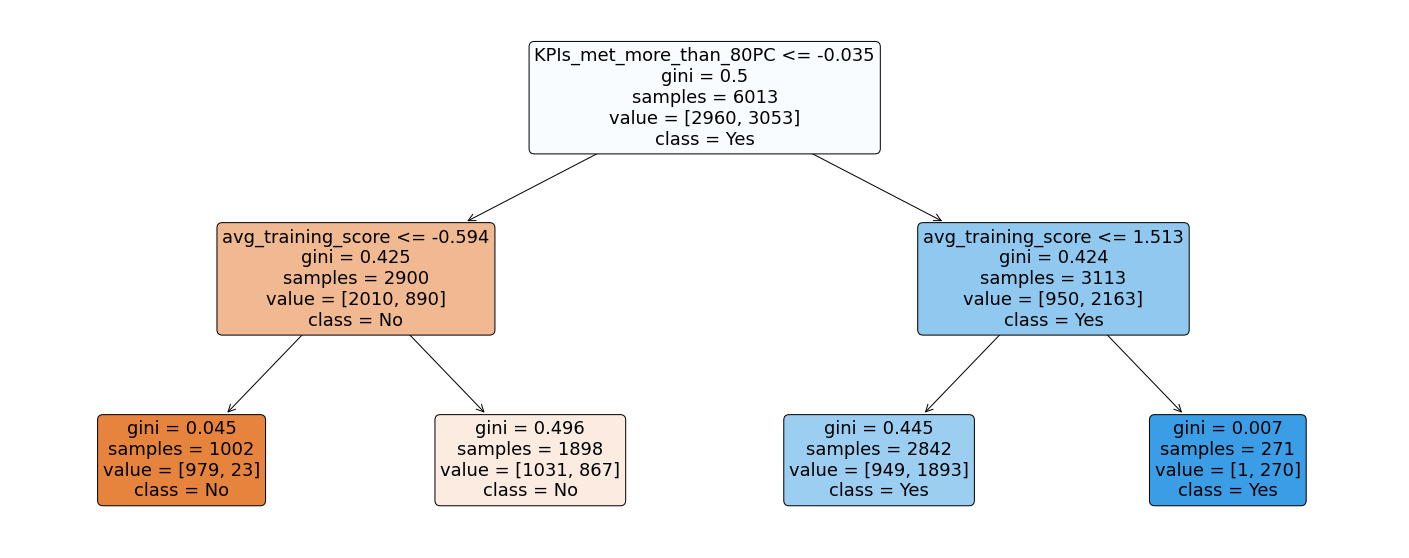

In [234]:
plt.figure(figsize=(25,10))

tree.plot_tree(decision_tree,
              feature_names = list(hr_df_trimmed.drop(['is_promoted'], axis=1)),
                class_names = ['No', 'Yes'], # 0 = Not promoted, 1 = promoted 
                rounded = True,
                filled= True)

plt.savefig('tree1.png',format='png')

plt.show()     

In [235]:
# Separate feature columns and the target column.

feature_cols = [x for x in hr_df_trimmed.columns if x != 'is_promoted']

feature_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80PC',
 'awards_won',
 'avg_training_score']

In [236]:
text_representation = tree.export_text(decision_tree)
print(text_representation)

# Save the tree to the file.

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_9 <= -0.04
|   |--- feature_11 <= -0.59
|   |   |--- class: 0
|   |--- feature_11 >  -0.59
|   |   |--- class: 0
|--- feature_9 >  -0.04
|   |--- feature_11 <= 1.51
|   |   |--- class: 1
|   |--- feature_11 >  1.51
|   |   |--- class: 1



## Evaluate And Improve The Model(s) 2

#### Evaluate Model 2A Using Training Set

In [237]:
# Evaluate training accuracy.

train_acc = decision_tree.score(X_train_scaled, y_train)

print('Training Accuracy: %.2f%%' % (train_acc*100))

Training Accuracy: 69.40%


#### Evaluate Model 2A Using  Holdout Validation Approach

In [238]:
# Evaluate testing accuracy.

test_acc = decision_tree.score(X_test_scaled, y_test)

print(f'Testing Accuracy: %.2f%%' % (test_acc*100))

Testing Accuracy: 67.95%


### Improve Model 2B: Decision Tree Classifier - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 2B Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*. 

In [239]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('decision_tree', tree.DecisionTreeClassifier(max_depth = 2))])

In [240]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

Training_Score:  [0.69106029 0.69355509 0.6968815  0.68946165 0.69902307]
Testing_Score:  [0.70573566 0.6957606  0.68246052 0.71214642 0.67387687]


The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [241]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

Cross Validation Training Accuracy:, 69.40%
Cross Validation Testing Accuracy:, 69.40%


As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split.

### Confusion Matrix - Train Test Split

In [242]:
# Use the model to perform prediction on test data.

y_pred = decision_tree.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1284
           1       0.68      0.69      0.68      1293

    accuracy                           0.68      2577
   macro avg       0.68      0.68      0.68      2577
weighted avg       0.68      0.68      0.68      2577



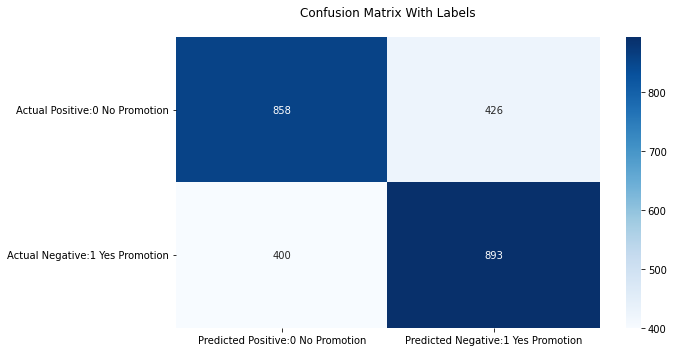

In [243]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


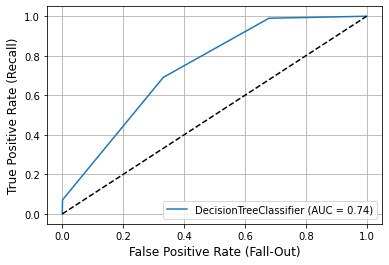

In [244]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(decision_tree, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [245]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(decision_tree, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1284
           1       0.68      0.69      0.68      1293

    accuracy                           0.68      2577
   macro avg       0.68      0.68      0.68      2577
weighted avg       0.68      0.68      0.68      2577



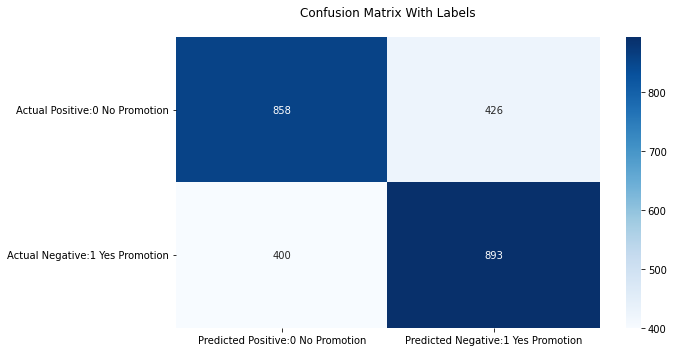

In [246]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Improve Model 2C: Decision Tree Classifier - Fine Tune Hyperparameters (GridSearch)

The `DecisionTreeClassifier` has a few model hyperparameters which restrict the shape of Decision Tree [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* `criterion`: the metrics used to measure the impurity of each node (e.g. gini, entropy and etc.);
* `min_samples_leaf`: the minimum number of samples a leaf node must have;
* `min_samples_split`: the minimum number of samples a node must have before it can be split;
* `max_depth`: the maximum depth of the tree. 

You should get Scikit-Learn's `GridSearchCV` to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

scoring : str, callable, list, tuple or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

n_jobs : int, default=None   
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [247]:
# Determine hyperparameters to auto tune.

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

In [248]:
# Use GridSearch to find the best combination of model hyperparameters.

gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy',
                  cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled, y_train) 

In [249]:
# best_score_ : float = Mean cross-validated score of the best_estimator.

print(gs.best_score_)

0.7779741405520146


In [250]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12}


In [251]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037506,0.014262,0.008885,0.006128,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712625,...,0.683860,0.695507,0.668885,0.710483,0.713810,0.660566,0.687188,0.693990,0.017679,151
1,0.023090,0.009649,0.010360,0.007050,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712625,...,0.683860,0.695507,0.668885,0.710483,0.713810,0.660566,0.687188,0.693990,0.017679,151
2,0.025926,0.009403,0.007993,0.003826,gini,2,1,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712625,...,0.683860,0.695507,0.668885,0.710483,0.713810,0.660566,0.687188,0.693990,0.017679,151
3,0.018717,0.013398,0.002968,0.000818,gini,2,1,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712625,...,0.683860,0.695507,0.668885,0.710483,0.713810,0.660566,0.687188,0.693990,0.017679,151
4,0.015803,0.006436,0.003182,0.001623,gini,2,1,16,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712625,...,0.683860,0.695507,0.668885,0.710483,0.713810,0.660566,0.687188,0.693990,0.017679,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.035745,0.011126,0.008732,0.004716,entropy,7,10,2,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.777409,...,0.768719,0.767055,0.753744,0.775374,0.778702,0.740433,0.772047,0.767667,0.013271,32
176,0.034229,0.009714,0.008188,0.004053,entropy,7,10,4,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.777409,...,0.768719,0.767055,0.753744,0.775374,0.778702,0.740433,0.772047,0.767667,0.013271,32
177,0.028722,0.012455,0.003918,0.001232,entropy,7,10,10,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.777409,...,0.768719,0.767055,0.753744,0.775374,0.778702,0.740433,0.772047,0.767667,0.013271,32
178,0.026531,0.009243,0.005871,0.003194,entropy,7,10,12,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.777409,...,0.768719,0.767055,0.753744,0.775374,0.778702,0.740433,0.772047,0.767667,0.013271,32


In [252]:
# Create Decision Tree using the best hyperparameters.

decision_tree1 = tree.DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf = 5, 
                                            min_samples_split =16, random_state=1)

# Fit the model to the training set.

decision_tree1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=16,
                       random_state=1)

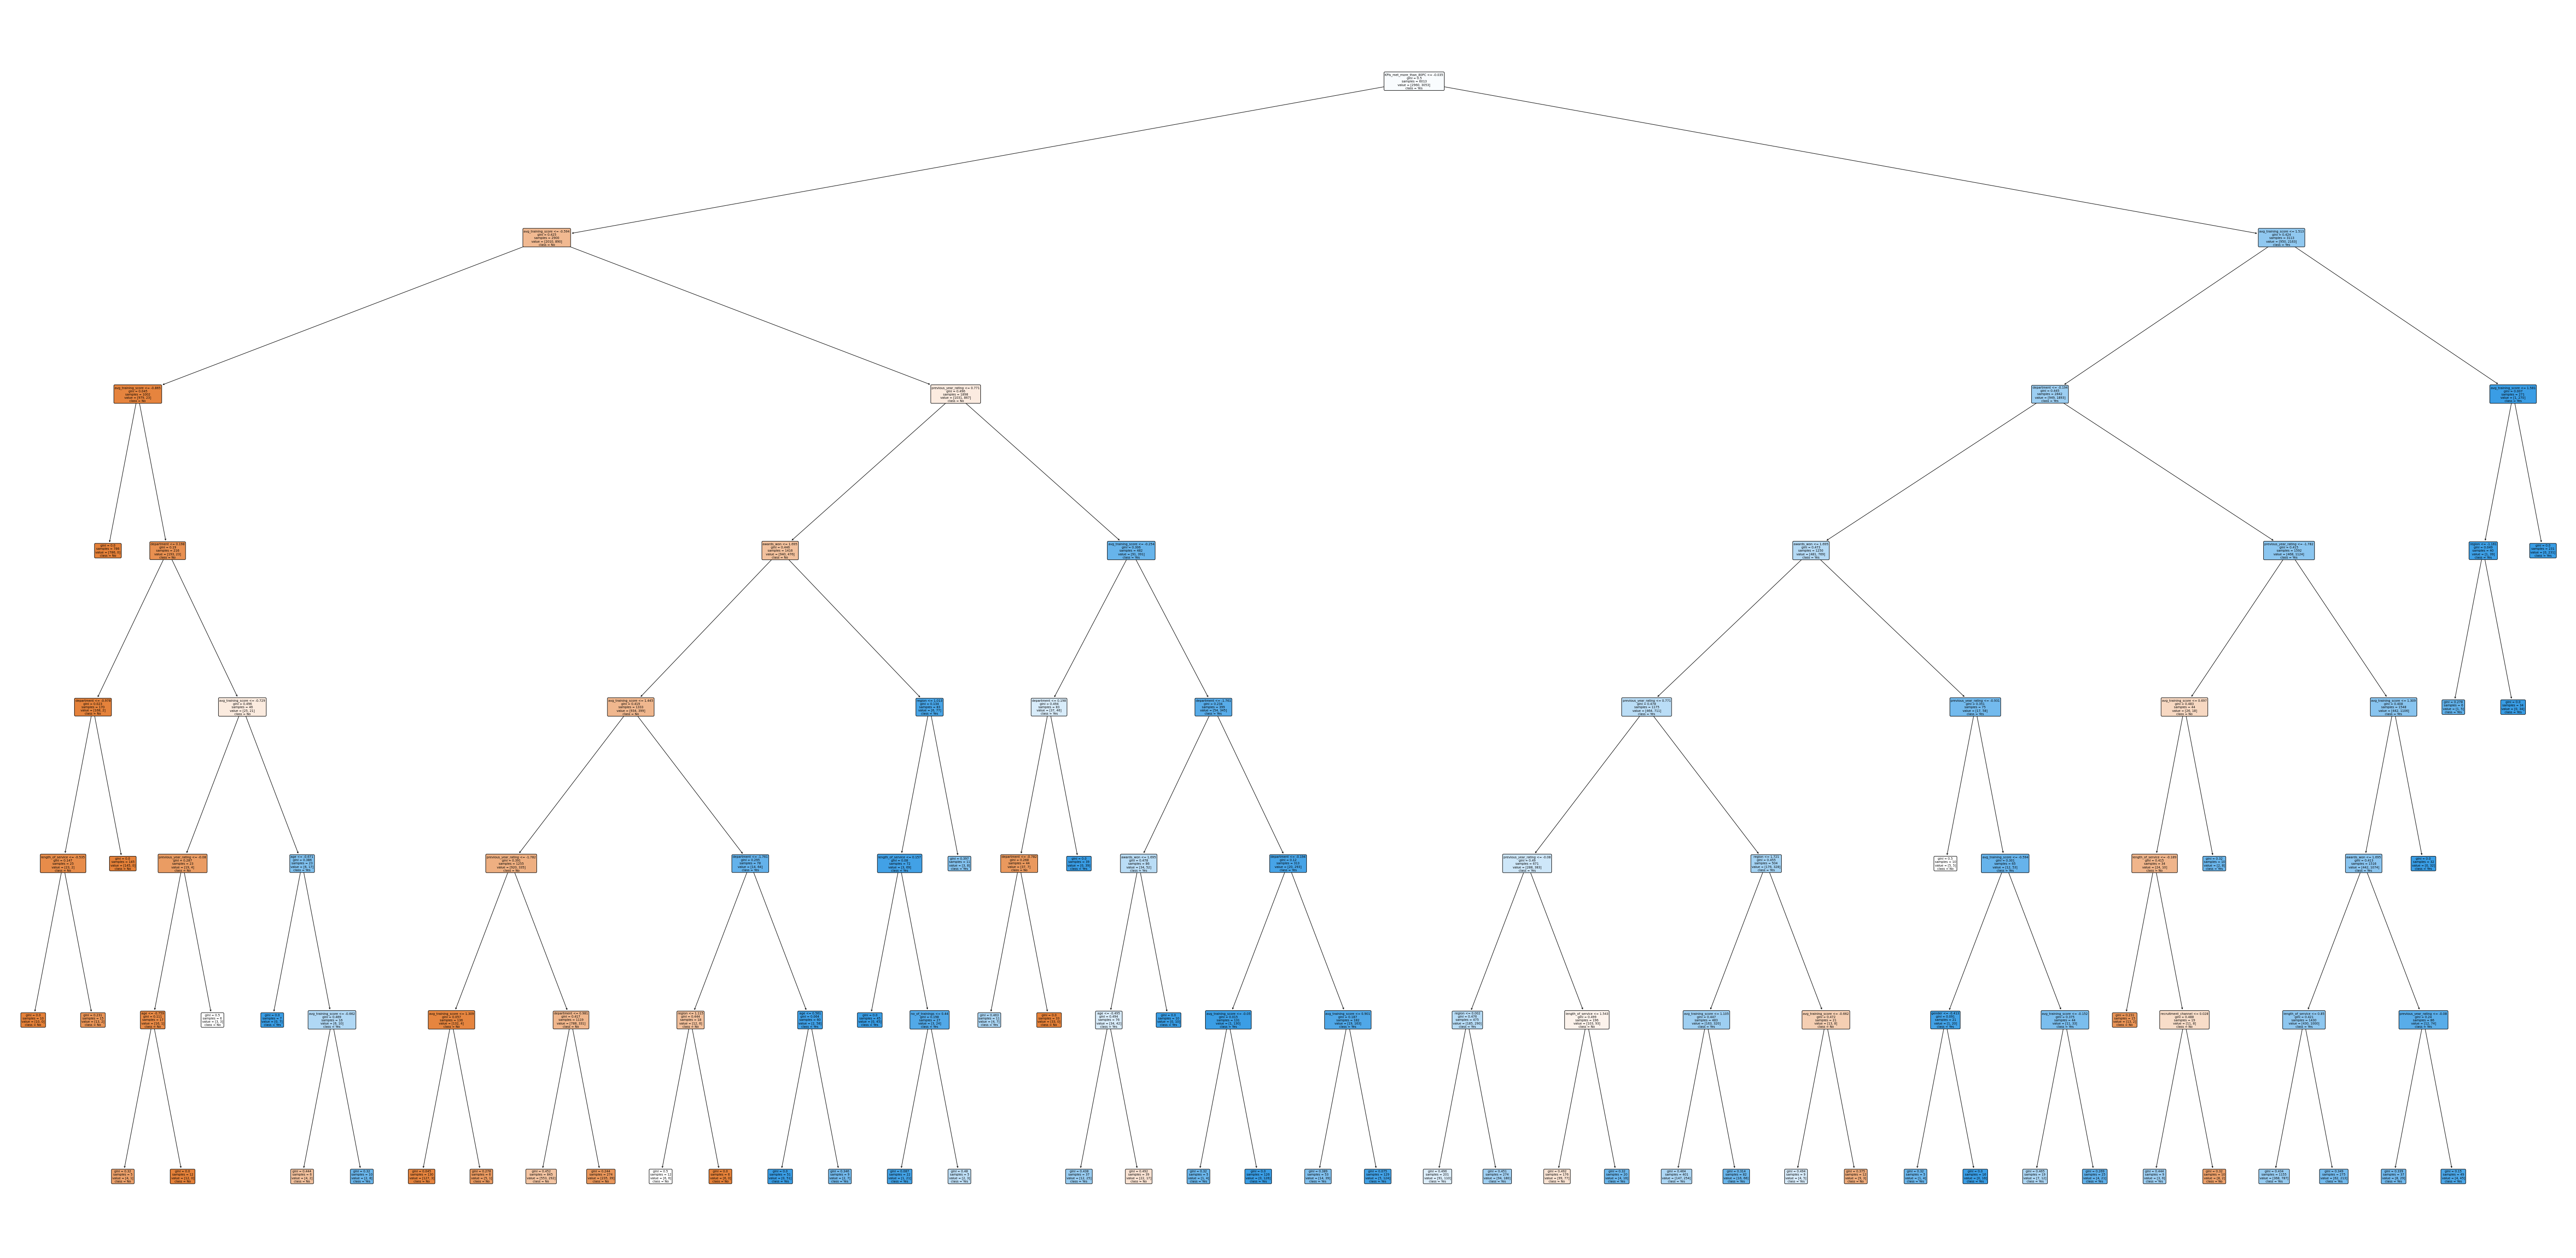

In [253]:
fig, ax = plt.subplots(figsize=(100,50), constrained_layout=False) # Object oriented style.

tree.plot_tree(decision_tree1,
              feature_names = list(hr_df_trimmed.drop(['is_promoted'], axis=1)),
                class_names = ['No', 'Yes'], # 0 = Not promoted, 1 = promoted 
                rounded = True,
                filled= True)

plt.savefig('tree2.png',format='png')

plt.show()  

In [254]:
# Separate feature columns and the target column.

feature_cols = [x for x in hr_df_trimmed.columns if x != 'is_promoted']

feature_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80PC',
 'awards_won',
 'avg_training_score']

In [255]:
text_representation1 = tree.export_text(decision_tree1)
print(text_representation1)

# Save the tree to the file.

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation1)

|--- feature_9 <= -0.04
|   |--- feature_11 <= -0.59
|   |   |--- feature_11 <= -0.87
|   |   |   |--- class: 0
|   |   |--- feature_11 >  -0.87
|   |   |   |--- feature_0 <= 0.20
|   |   |   |   |--- feature_0 <= -0.98
|   |   |   |   |   |--- feature_8 <= -0.54
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  -0.54
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.98
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.20
|   |   |   |   |--- feature_11 <= -0.73
|   |   |   |   |   |--- feature_7 <= -0.08
|   |   |   |   |   |   |--- feature_6 <= -0.76
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  -0.76
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  -0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  -0.73
|   |   |   |   |   |--- feature_6 <= -0.67
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 > 

#### Evaluate Model 2C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*. 

In [256]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('decision_tree1', tree.DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf = 5, 
                                            min_samples_split =16, random_state=1))])

In [257]:
print('---Improved Model 2C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (decision_tree1.score(X_train_scaled,y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (decision_tree1.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.
results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

---Improved Model 2C---
Train Test Split Training Accuracy:, 78.10%
Train Test Split Testing Accuracy:, 75.36%
Cross Validation Training Accuracy:, 80.31%
Cross Validation Testing Accuracy:, 77.76%


### Confusion Matrix - Train Test Split

In [258]:
# Use the model to perform prediction on test data.

y_pred = decision_tree1.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1284
           1       0.72      0.83      0.77      1293

    accuracy                           0.75      2577
   macro avg       0.76      0.75      0.75      2577
weighted avg       0.76      0.75      0.75      2577



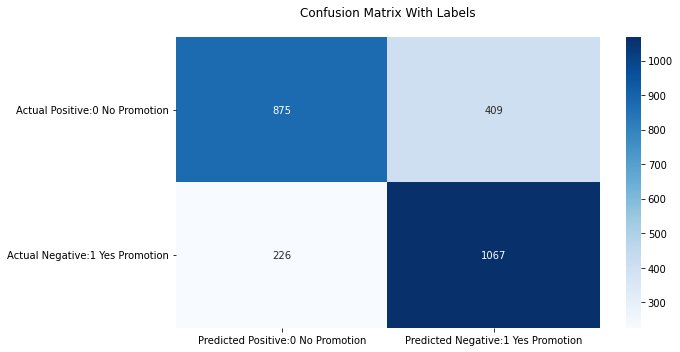

In [259]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


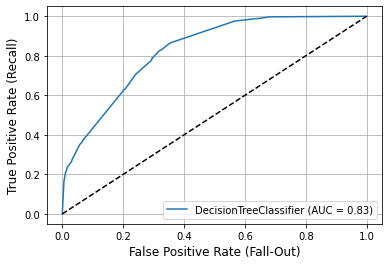

In [260]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(decision_tree1, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [261]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(decision_tree1, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1284
           1       0.71      0.82      0.76      1293

    accuracy                           0.74      2577
   macro avg       0.75      0.74      0.74      2577
weighted avg       0.75      0.74      0.74      2577



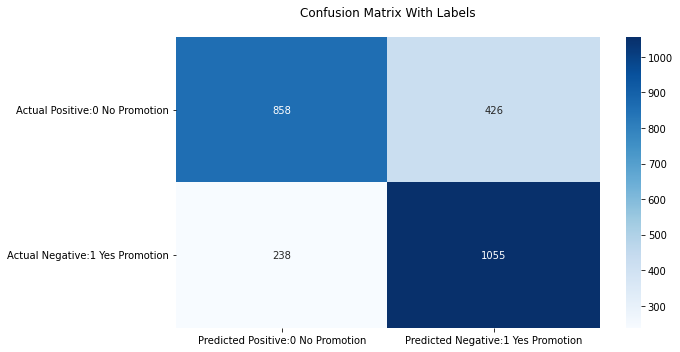

In [262]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Build The Model(s) 3

### Model 3A: Decision Tree Classifier Using Feature Importances - Baseline

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.



In [263]:
decision_tree1.feature_importances_

array([8.50135660e-02, 7.40844112e-03, 0.00000000e+00, 2.43233280e-04,
       1.64662530e-03, 8.17457302e-04, 3.66389402e-03, 1.60038462e-01,
       8.45446525e-03, 3.60652143e-01, 5.86194043e-02, 3.13442309e-01])

In [264]:
# Separate feature columns and the target column.

feature_cols = [x for x in hr_df_trimmed.columns if x != 'is_promoted']

feature_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80PC',
 'awards_won',
 'avg_training_score']

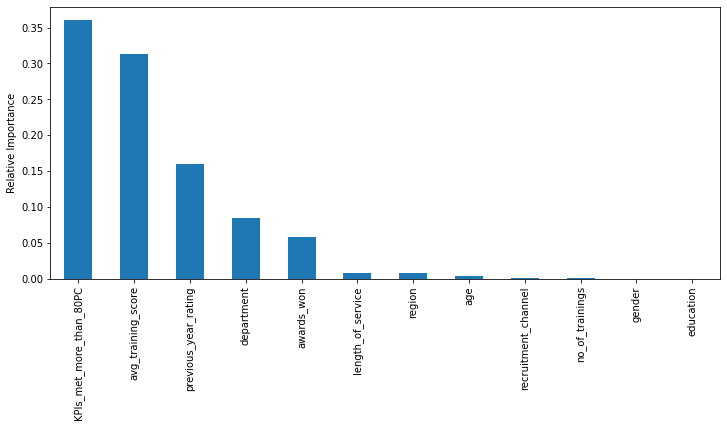

In [265]:
# Plot the bar chart for features importances in descending order.

feature_imp = pd.Series(decision_tree1.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')

ax.set(ylabel='Relative Importance');

In [266]:
# Define model inputs (X) with selected features importance & Output (y).

dfX_new = hr_df_trimmed[['KPIs_met_more_than_80PC', 'avg_training_score', 'previous_year_rating', 'department',
                             'awards_won']]

dfy_new = hr_df_trimmed[['is_promoted']]

In [267]:
# Repeat training process using sklearn method with reduced features.

X_new = dfX_new.to_numpy() # Convert the DataFrame to a NumPy array
y_new = dfy_new.to_numpy() # Convert the DataFrame to a NumPy array

# Inspect the print out.

print(X_new)
print(y_new)

[[ 1 50  5  7  0]
 [ 1 51  5  7  0]
 [ 1 58  3  1  1]
 ...
 [ 1 81  4  8  0]
 [ 0 52  3  7  0]
 [ 0 81  4  0  0]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [268]:
# Split both Inputs (X) and Output (y) into training set (70%) and testing set (30%)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y_new, test_size=0.3, random_state=2)

In [269]:
# standardisation: with the StandardScaler from sklearn.
# sklearn.preprocessing.StandardScaler standardize feature by remove mean & scaling to unit variance.

# The standard score of a sample x is calculated as:
# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

# Set up the scaler transformer.

scaler1 = StandardScaler()

# Fit it to the train set so that it learns each variable's mean and standard deviation.

scaler1.fit(X_train1)

# Standardize (transform) the train and test sets with the trained scaler.

X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

In [270]:
# Create a Decision Tree Model.

decision_tree2 = tree.DecisionTreeClassifier(max_depth = 2)

# Build a decision tree classifier from the training set.

decision_tree2.fit(X_train_scaled1, y_train1)

DecisionTreeClassifier(max_depth=2)

tree.plot_tree plot a decision tree. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

decision_tree : decision tree regressor or classifier  
The decision tree to be plotted.

feature_names : list of strings, default=None   
Names of each of the features. If None, generic names will be used (“X[0]”, “X[1]”, …).

class_names : list of str or bool, default=None   
Names of each of the target classes in ascending numerical order. Only relevant for classification and not supported for multi-output. If True, shows a symbolic representation of the class name.

rounded : bool, default=False   
When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.


filled : bool, default=False    
When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

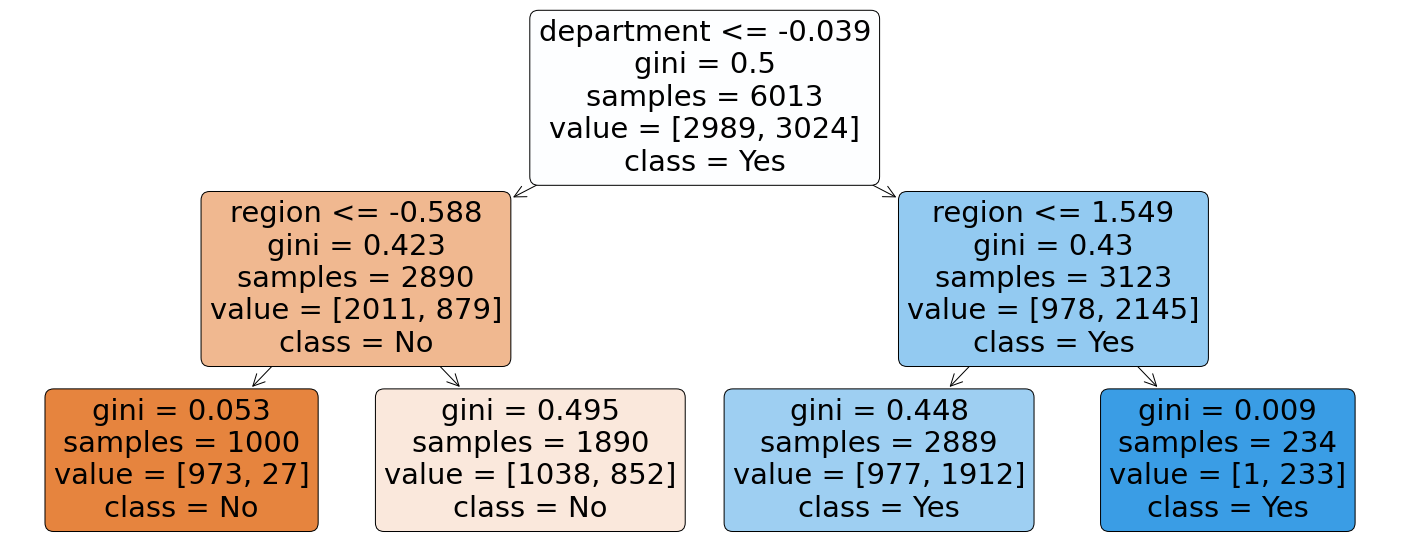

In [271]:
plt.figure(figsize=(25,10))

tree.plot_tree(decision_tree2,
              feature_names = list(hr_df_trimmed.drop(['is_promoted'], axis=1)),
                class_names = ['No', 'Yes'], # 0 = Not promoted, 1 = promoted 
                rounded = True,
                filled= True)

plt.savefig('tree1.png',format='png')

plt.show()  

In [272]:
# Separate feature columns and the target column.

feature_cols = [x for x in hr_df_trimmed.columns if x != 'is_promoted']

feature_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80PC',
 'awards_won',
 'avg_training_score']

In [273]:
text_representation2 = tree.export_text(decision_tree2)
print(text_representation2)

# Save the tree to the file.

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation2)

|--- feature_0 <= -0.04
|   |--- feature_1 <= -0.59
|   |   |--- class: 0
|   |--- feature_1 >  -0.59
|   |   |--- class: 0
|--- feature_0 >  -0.04
|   |--- feature_1 <= 1.55
|   |   |--- class: 1
|   |--- feature_1 >  1.55
|   |   |--- class: 1



## Evaluate And Improve The Model(s) 3

#### Evaluate Model 3A Using Training Set

In [274]:
# Evaluate training accuracy.

train_acc = decision_tree2.score(X_train_scaled1, y_train1)

print('Training Accuracy: %.2f%%' % (train_acc*100))

Training Accuracy: 69.12%


#### Evaluate Model 3A Using  Holdout Validation Approach

In [275]:
# Evaluate testing accuracy.

test_acc = decision_tree2.score(X_test_scaled1, y_test1)

print('Testing Accuracy: %.2f%%' % (test_acc*100))

Testing Accuracy: 68.61%


### Improve Model 3B: Decision Tree Classifier - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 3B Using Training & Testing Set

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [276]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('decision_tree2', tree.DecisionTreeClassifier(max_depth = 2))])

In [277]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train1, y_train1, scoring='accuracy',
                          cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

Training_Score:  [0.68794179 0.69189189 0.69002079 0.69008522 0.69590522]
Testing_Score:  [0.70407315 0.6882793  0.6957606  0.69550749 0.67221298]


The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [278]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

Cross Validation Training Accuracy:, 69.12%
Cross Validation Testing Accuracy:, 69.12%


As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split.

### Confusion Matrix - Train Test Split

In [279]:
# Use the model to perform prediction on test data.

y_pred = decision_tree2.predict(X_test_scaled1) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test1, y_pred)) 

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1255
           1       0.70      0.69      0.69      1322

    accuracy                           0.69      2577
   macro avg       0.69      0.69      0.69      2577
weighted avg       0.69      0.69      0.69      2577



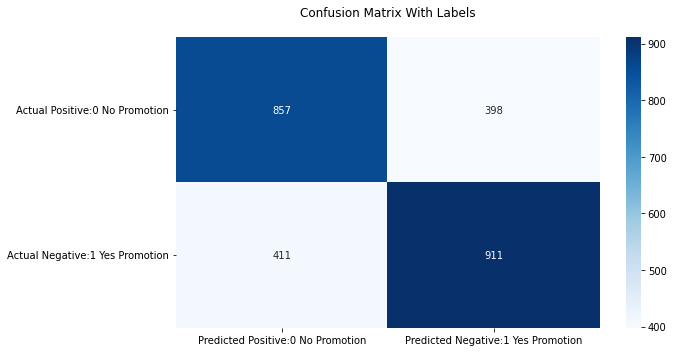

In [280]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test1, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


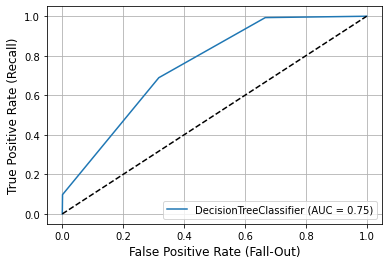

In [281]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(decision_tree2, X_test_scaled1, y_test1)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [282]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(decision_tree2, X_test_scaled1, y_test1, cv=5)

print(classification_report(y_test1, y_pred)) 

              precision    recall  f1-score   support

           0       0.77      0.51      0.61      1255
           1       0.65      0.85      0.74      1322

    accuracy                           0.69      2577
   macro avg       0.71      0.68      0.67      2577
weighted avg       0.70      0.69      0.68      2577



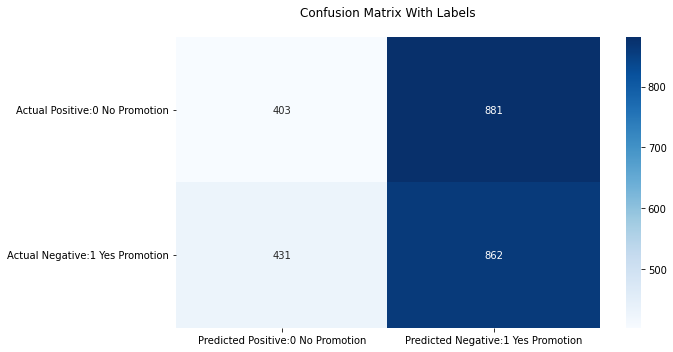

In [283]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Improve Model 3C: Decision Tree Classifier - Fine Tune Hyperparameters (GridSearch)

The `DecisionTreeClassifier` has a few model hyperparameters which restrict the shape of Decision Tree [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* `criterion`: the metrics used to measure the impurity of each node (e.g. gini, entropy and etc.);
* `min_samples_leaf`: the minimum number of samples a leaf node must have;
* `min_samples_split`: the minimum number of samples a node must have before it can be split;
* `max_depth`: the maximum depth of the tree.

You should get Scikit-Learn's `GridSearchCV` to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

scoring : str, callable, list, tuple or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

n_jobs : int, default=None   
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [284]:
# Use GridSearch to find the best combination of model hyperparameters.

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

In [285]:
# Use GridSearch to find the best combination of model hyperparameters.

gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, 
                              scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled1, y_train1) 

In [286]:
# best_score_ : float = Mean cross-validated score of the best_estimator

print(gs.best_score_)

0.7834682567015628


In [287]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [288]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006210,0.002614,0.001295,0.000657,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.704073,0.688279,0.695761,0.695507,0.672213,0.691167,0.010715,151
1,0.005309,0.002285,0.000912,0.000063,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.704073,0.688279,0.695761,0.695507,0.672213,0.691167,0.010715,151
2,0.004720,0.002111,0.002332,0.002837,gini,2,1,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.704073,0.688279,0.695761,0.695507,0.672213,0.691167,0.010715,151
3,0.005951,0.003385,0.000798,0.000091,gini,2,1,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.704073,0.688279,0.695761,0.695507,0.672213,0.691167,0.010715,151
4,0.004258,0.002392,0.004986,0.003410,gini,2,1,16,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.704073,0.688279,0.695761,0.695507,0.672213,0.691167,0.010715,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.008999,0.000582,0.000995,0.000092,entropy,7,10,2,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.791355,0.766417,0.788030,0.793677,0.770383,0.781972,0.011296,13
176,0.006042,0.002160,0.000810,0.000215,entropy,7,10,4,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.791355,0.766417,0.788030,0.793677,0.770383,0.781972,0.011296,13
177,0.003549,0.000066,0.000533,0.000012,entropy,7,10,10,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.791355,0.766417,0.788030,0.793677,0.770383,0.781972,0.011296,13
178,0.004968,0.001181,0.000809,0.000225,entropy,7,10,12,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.791355,0.766417,0.788030,0.793677,0.770383,0.781972,0.011296,13


In [289]:
# Create Decision Tree using the best hyperparameters.

decision_tree3 = tree.DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf = 1, 
                                            min_samples_split =4, random_state=1)

# Fit the model to the training set.

decision_tree3.fit(X_train_scaled1, y_train1)

DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=1)

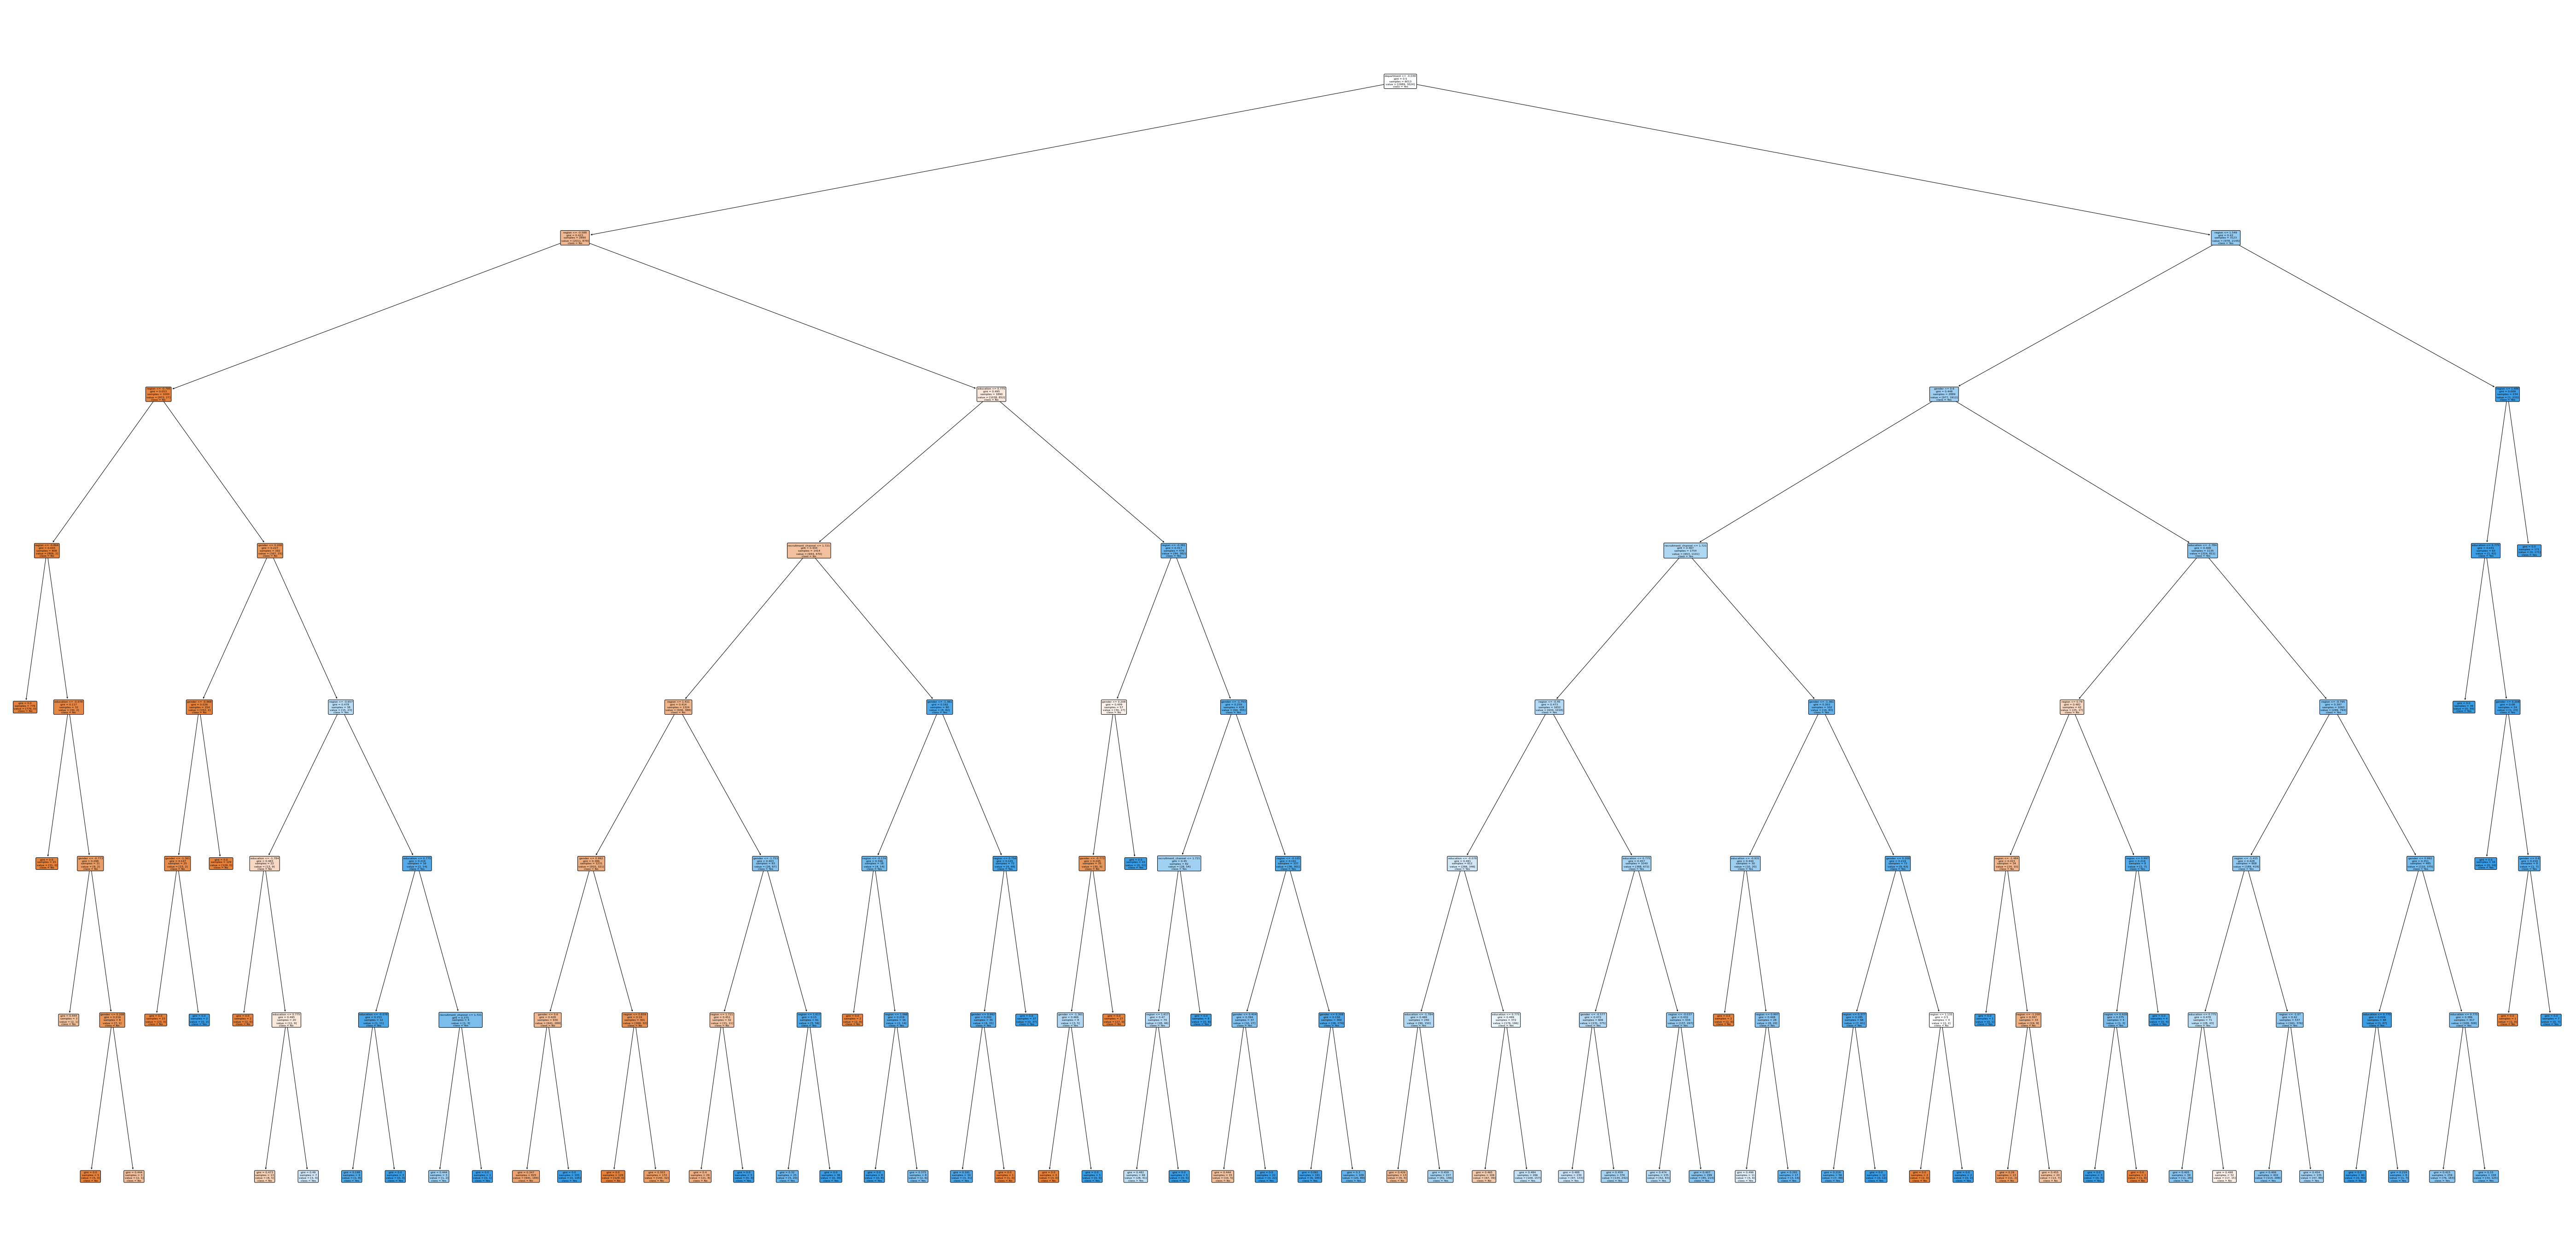

In [290]:
fig, ax = plt.subplots(figsize=(100,50), constrained_layout=False) # Object oriented style.

tree.plot_tree(decision_tree3,
              feature_names = list(hr_df_trimmed.drop(['is_promoted'], axis=1)),
                class_names = ['No', 'Yes'], # 0 = Not promoted, 1 = promoted 
                rounded = True,
                filled= True)

plt.savefig('tree3.png',format='png')

plt.show()  

In [291]:
# Separate feature columns and the target column.

feature_cols = [x for x in hr_df_trimmed.columns if x != 'is_promoted']

feature_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80PC',
 'awards_won',
 'avg_training_score']

In [292]:
text_representation3 = tree.export_text(decision_tree3)
print(text_representation3)

# Save the tree to the file.

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation3)

|--- feature_0 <= -0.04
|   |--- feature_1 <= -0.59
|   |   |--- feature_1 <= -0.79
|   |   |   |--- feature_1 <= -0.86
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.86
|   |   |   |   |--- feature_2 <= -0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  -0.08
|   |   |   |   |   |--- feature_3 <= -0.77
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  -0.77
|   |   |   |   |   |   |--- feature_3 <= 0.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  0.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.79
|   |   |   |--- feature_3 <= 0.21
|   |   |   |   |--- feature_3 <= -0.97
|   |   |   |   |   |--- feature_3 <= -1.36
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  -1.36
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -0.97
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.21
|   |   |   |   

#### Evaluate Model 3C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [293]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('decision_tree3', tree.DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf = 1, 
                                            min_samples_split =4, random_state=1))])

In [294]:
print('---Improved Model 3C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (decision_tree3.score(X_train_scaled1,y_train1)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (decision_tree3.score(X_test_scaled1,y_test1)*100))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train1, y_train1, scoring='accuracy', cv=5,
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

---Improved Model 3C---
Train Test Split Training Accuracy:, 79.59%
Train Test Split Testing Accuracy:, 78.42%
Cross Validation Training Accuracy:, 79.57%
Cross Validation Testing Accuracy:, 78.36%


### Confusion Matrix - Train Test Split

In [295]:
# Use the model to perform prediction on test data.

y_pred = decision_tree3.predict(X_test_scaled1) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test1, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.68      0.76      1255
           1       0.75      0.88      0.81      1322

    accuracy                           0.78      2577
   macro avg       0.79      0.78      0.78      2577
weighted avg       0.79      0.78      0.78      2577



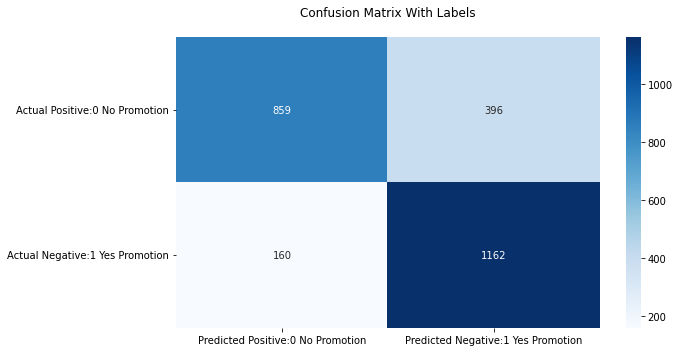

In [296]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test1, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


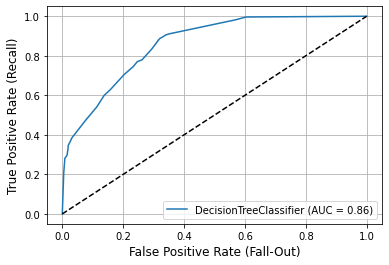

In [297]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(decision_tree3, X_test_scaled1, y_test1)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [298]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(decision_tree3, X_test_scaled1, y_test1, cv=5)

print(classification_report(y_test1, y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1255
           1       0.74      0.84      0.79      1322

    accuracy                           0.77      2577
   macro avg       0.77      0.76      0.76      2577
weighted avg       0.77      0.77      0.76      2577



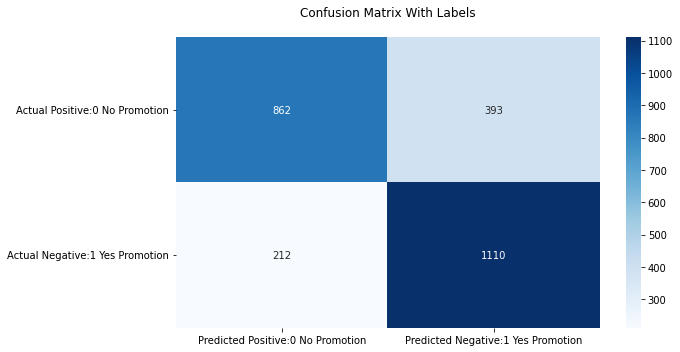

In [299]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test1, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Build The Model(s) 4

### Model 4A: Random Forest Classifier - Baseline

In [300]:
# Build a Random Forest Model.

rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)

# Fit the model to the training set

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=2)

## Evaluate And Improve The Model(s) 4

#### Evaluate Model 4A Using Training Set

In [301]:
# Evaluate training accuracy.

print('Training Accuracy:, %.2f%%' % (rf.score(X_train_scaled, y_train)*100))

Training Accuracy:, 99.98%


#### Evaluate Model 4A Using  Holdout Validation Approach

In [302]:
# Evaluate testing accuracy.

print('Testing Accuracy:, %.2f%%' % (rf.score(X_test_scaled, y_test)*100))

Testing Accuracy:, 78.39%


### Improve Model 4B: Random Forest Classifier - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 4B Using Training & Testing Set

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [303]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1))])

In [304]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

Training_Score:  [0.9997921  0.9997921  1.         0.99979214 1.        ]
Testing_Score:  [0.78221114 0.80964256 0.78221114 0.7936772  0.77953411]


The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [305]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

Cross Validation Training Accuracy:, 99.99%
Cross Validation Testing Accuracy:, 78.95%


As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split.

### Confusion Matrix - Train Test Split

In [306]:
# Use the model to perform prediction on test data.

y_pred = rf.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1284
           1       0.74      0.87      0.80      1293

    accuracy                           0.78      2577
   macro avg       0.79      0.78      0.78      2577
weighted avg       0.79      0.78      0.78      2577



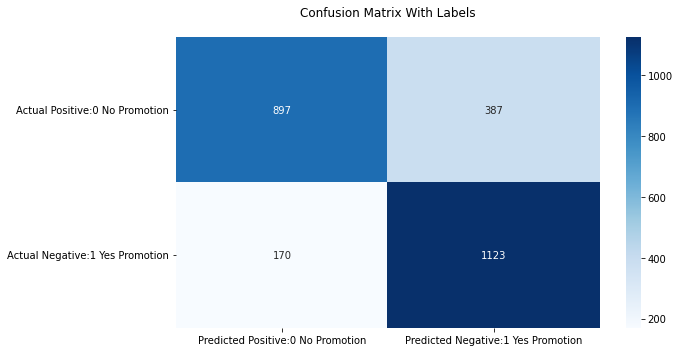

In [307]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


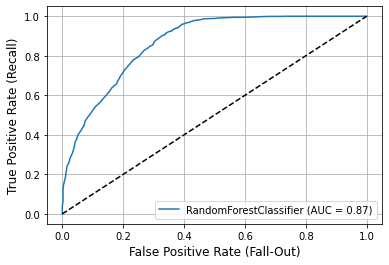

In [308]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(rf, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [309]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(rf, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1284
           1       0.73      0.83      0.78      1293

    accuracy                           0.76      2577
   macro avg       0.77      0.76      0.76      2577
weighted avg       0.77      0.76      0.76      2577



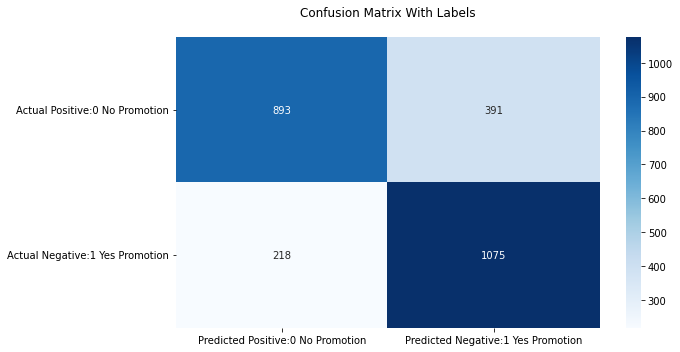

In [310]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Improve Model 4C: Random Forest Classifier - Fine Tune Hyperparameters (GridSearch)

You should get Scikit-Learn's `GridSearchCV` to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

scoring : str, callable, list, tuple or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

n_jobs : int, default=None   
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [311]:
# Use GridSearch to find the best combination of model hyperparameters.

param_grid = { 'criterion' : ['gini', 'entropy'], 'n_estimators' : [100, 200, 300],
              'max_depth' : [2, 4, 5, 8, 10, 20], 'min_samples_leaf' : [2, 3, 4, 5]}

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters.

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled, y_train) 

In [ ]:
# best_score_ : float = Mean cross-validated score of the best_estimator

print(gs.best_score_)

In [ ]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Build Random Forest Model using the best hyperparameters.

rf1 = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                             n_estimators=300, random_state=2, n_jobs=-1)

# Fit the model to the training set.

rf1.fit(X_train_scaled, y_train)

#### Evaluate Model 4C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rf1', RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                             n_estimators=300, random_state=2, n_jobs=-1))])

In [ ]:
print('---Improved Model 4C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (rf1.score(X_train_scaled,y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (rf1.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = rf1.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(rf1, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(rf1, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Build The Model(s) 5

### Model 5A: Support Vector Classification (SVC) - Baseline

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. [Link](https://scikit-learn.org/stable/modules/svm.html) [Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[The advantages of support vector machines are:](x)

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

[The disadvantages of support vector machines include:](X)

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’    
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 

degree : int, default=3
Degree of the polynomial kernel function (‘poly’).

coef0 : float, default=0.0   
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

C : float, default=1.0   
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [ ]:
# Build a SVC Model.

svm = SVC(kernel='rbf', degree=2, coef0=1, C=5)

# Fit the SVM Model according to the given training data.

svm.fit(X_train_scaled, y_train)

## Evaluate And Improve The Model(s) 5

#### Evaluate Model 5A Using Training Set

In [ ]:
# Evalute the training accuracy.

print('Training Accuracy:, %.2f%%' % (svm.score(X_train_scaled, y_train)*100))

#### Evaluate Model 5A Using  Holdout Validation Approach

In [ ]:
# Evalute the testing accuracy.

print('Testing Accuracy:, %.2f%%' % (svm.score(X_test_scaled, y_test)*100))

### Model 5B: Support Vector Classification (SVC) - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 5B Using Training &  Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(kernel='rbf', degree=2, coef0=1, C=5))])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score:', results['train_score'])
print('Testing_Score:', results['test_score'])

The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split.

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = svm.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(svm, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(svm, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Model 5C: Support Vector Classification (SVC) - Fine Tune One Hyperparameters (Degree)

Instead of tuning multiple parameters using grid search, **this time we will be only tuning one parameter (i.e. degree)**. Through this process, you will be having a [better understanding on model underfitting and overfitting (bias and variance)](x). 

#### Learning Curve Plot

In [ ]:
# Evaluate model performance on train and test sets with different hyperparameters for each configuration to 
# understand the laerning dynamics.

# split into train test sets.

X_train, X_test, y_train, y_test = train_test_split(
    hr_df_trimmed.drop('is_promoted', axis=1), hr_df_trimmed['is_promoted'], test_size=0.3, random_state=0)

# Define lists to collect scores.

train_scores, test_scores = list(), list()

# Define the range of degree to evaluate.

values = [i for i in range(1, 11)]

# Evaluate a SVC for each degree.
for i in values:
     # Configure the model.
    model = svm = SVC(kernel='poly', degree=i, coef0=1, C=5)
    # fit model on the training dataset.
    model.fit(X_train, y_train)
    # Evaluate on the train dataset.
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # Evaluate on the test dataset.
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # Summarize progress.
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# Plot of train and test scores vs number of degree.

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

From the above figures, we can see that:
* Initially model is underfitting, so after increase `degree` from 1 to 2, **both training & testing degree are diverging from each other** i.e. model is [overfitting](x). 

Therefore, we think the ideal `degree` is around 2. Now let's build our final model using `degree =2`.

#### Evaluate Model 5C Using Training & Holdout Validation Approach

In [ ]:
# Train the SVC Model based on best parameters.

svm1 = SVC(kernel='poly', degree=2, coef0=1, C=5)

# Fit the SVM model according to the given training data.

svm1.fit(X_train_scaled, y_train)

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(kernel='poly', degree=2, coef0=1, C=5))])

In [ ]:
print('---Improved Model 5C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (svm1.score(X_train_scaled,y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (svm1.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.
results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = svm1.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(svm1, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(svm1, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Model 5D: Support Vector Classification (SVC) - Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = {"kernel": ["linear", "poly", "rbf"],
              "degree": [3, 4], 
              "coef0" : [1, 3], 
              "C": [3, 4]}

In [ ]:
# Perform Grid Search.

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit with all sets of parameters.

gs = gs.fit(X_train, y_train) # GridSearchCV uses training set to perform cross validation - avoid data leakage

In [ ]:
# Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Train the SVC Model based on best parameters.

svm2 = SVC(kernel='poly', degree=4, coef0=3, C=4)

# Fit the SVM model according to the given training data.

svm2.fit(X_train_scaled, y_train)

#### Evaluate Model 5D Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(kernel='poly', degree=4, coef0=3, C=4))])

In [ ]:
print('---Improved Model 5D---')
print('Train Test Split Training Accuracy:, %.2f%%' % (svm2.score(X_train_scaled,y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (svm2.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.
results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = svm2.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(svm2, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(svm2, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Build The Model(s) 6

### Model 6A: AdaBoost Classifier - Baseline

XGBClassifier performs the implementation of the scikit-learn API for XGBoost classification. [Link](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

learning_rate (Optional[float]) –    
Boosting learning rate (xgb’s “eta”)

eval_metric (Optional[Union[str, List[str], Callable]]) –  
Metric used for monitoring the training result and early stopping

In [ ]:
# Build Ada Boost Model.

adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.01)

# Fit the model to the training set.

adb.fit(X_train_scaled, y_train)

## Evaluate And Improve The Model(s) 6

#### Evaluate Model 6A Using Training Set

In [ ]:
# Evalute training accuracy.

print('Training Accuracy:, %.2f%%' % (adb.score(X_train_scaled, y_train)*100))

#### Evaluate Model 6A Using Holdout Validation Approach

In [ ]:
# Evalute testing accuracy.

print('Testing Accuracy:, %.2f%%' % (adb.score(X_test_scaled, y_test)*100))

### Model 6B: AdaBoost Classifier - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 6B Using Training &  Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('adb', AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.01))])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score:', results['train_score'])
print('Testing_Score:', results['test_score'])

The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split.

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = adb.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(adb, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(adb, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Model 6C: AdaBoost Classifier- Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
              'learning_rate': [0.1, 0.01, 0.2], 'algorithm': ['SAMME', 'SAMME.R']}

In [ ]:
# Perform Grid Search.

gs = GridSearchCV(estimator=AdaBoostClassifier(DecisionTreeClassifier()), param_grid=param_grid, 
                                               scoring='accuracy', cv=5, n_jobs=-1)
    
# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled, y_train) # GridSearchCV uses training set to perform cross validation - avoid data leakage

In [ ]:
# Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Build Ada Boost Model based on best parameters.

adb1 = AdaBoostClassifier(DecisionTreeClassifier(), algorithm='SAMME.R', n_estimators=250, learning_rate=0.2)

# Fit the model to the training set.

adb1.fit(X_train_scaled, y_train)

#### Evaluate Model 6C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('adb', AdaBoostClassifier(DecisionTreeClassifier(), algorithm='SAMME.R', 
                                                n_estimators=250, learning_rate=0.2))])

In [ ]:
print('---Improved Model 6C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (adb1.score(X_train_scaled,y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (adb1.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = adb1.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(adb1, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(adb1, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Build The Model(s) 7

### Model 7A: XGBoost Classifier  - Baseline

In [ ]:
# Build XGBoost Model.

xgboost = XGBClassifier(random_state=1,learning_rate=0.9
                        , eval_metric='auc', 
                        max_depth=1, n_estimators=100, use_label_encoder =False)

# Fit the model to the training set.

xgboost.fit(X_train_scaled, y_train)

## Evaluate And Improve The Model(s) 7

#### Evaluate Model 7A Using Training Set

In [ ]:
# Evaluate the training accuracy.

print('Training Accuracy:  %.2f%%' % (xgboost.score(X_train_scaled, y_train)*100))

#### Evaluate Model 7A Using Holdout Validation Approach

In [ ]:
# Evaluate the testing accuracy.

print('Testing Accuracy:  %.2f%%' % (xgboost.score(X_test_scaled, y_test)*100))

### Model 7B: XGBoost Classifier - K-Folds Cross Validation

cross_validate evaluates metric(s) by cross-validation and also record fit/score times. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

estimator : estimator object implementing ‘fit’  
The object to use to fit the data.

X : array-like of shape (n_samples, n_features)   
The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None  
The target variable to try to predict in the case of supervised learning.

scoring : str, callable, list, tuple, or dict, default=None  
Strategy to evaluate the performance of the cross-validated model on the test set.

cv : int, cross-validation generator or an iterable, default=None  
Determines the cross-validation splitting strategy. 

return_train_score : bool, default=False
Whether to include train scores.

#### Evaluate Model 7B Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('xgboost', XGBClassifier(random_state=1,learning_rate=0.9
                        , eval_metric='auc', 
                        max_depth=1, n_estimators=100, use_label_encoder =False))])

In [ ]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score:', results['train_score'])
print('Testing_Score:', results['test_score'])

The cross validation traning and testing accuracy will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

As an average of 5 experiments, the **cross validation measures (train and test accuracy) are more representative** than the simple split measures (train and test accuracy), which is only coming from one simple split.

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = xgboost.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(xgboost, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(xgboost, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### Model 7C: XGBoost Classifier - Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = { "eval_metric" : ["auc", "error", 'logloss'], "learning_rate" : [0.1, 0.5, 0.9],
              "max_depth" : [2, 4, 10], 'n_estimators' : [100, 200, 300]}

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters.

gs = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)

# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled, y_train) 

In [ ]:
# best_score_ : float = Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Build XGBoost Modelusing the best hyperparameters.

xgboost1 = XGBClassifier(random_state=1,learning_rate=0.1
                        , eval_metric='auc', 
                        max_depth=4, n_estimators=200,use_label_encoder =False)

# Fit the model to the training set.

xgboost1.fit(X_train_scaled, y_train)

#### Evaluate Model 7C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('xgboost', XGBClassifier(random_state=1,learning_rate=0.1
                        , eval_metric='auc', 
                        max_depth=4, n_estimators=200,use_label_encoder =False))])

In [ ]:
print('---Improved Model 7C---')
print('Train Test Split Training Accuracy:, %.2f%%' % (xgboost1.score(X_train_scaled,y_train)*100))
print('Train Test Split Testing Accuracy:, %.2f%%' % (xgboost1.score(X_test_scaled,y_test)*100))

# Evaluate the Model using K-folds Cross validation.
results  = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.
print('Cross Validation Training Accuracy:, %.2f%%' % (sum(results['train_score'])/len(results['train_score'])*100))
print('Cross Validation Testing Accuracy:, %.2f%%' % (sum(results['test_score'])/len(results['test_score'])*100))

### Confusion Matrix - Train Test Split

In [ ]:
# Use the model to perform prediction on test data.

y_pred = xgboost1.predict(X_test_scaled) # returns 0 or 1

# classification_report() in scikit-learn that gives all the metrics in one glance.

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

### AUC-ROC Curve - Train Test Split

In [ ]:
# Plot an AUC-ROC Curve.

auc = plot_roc_curve(xgboost1, X_test_scaled, y_test)

plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) 
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    
plt.grid(True) 
                                
plt.show()

### Confusion Matrix - Cross Validation

In [ ]:
# Use the model to perform prediction on test data.

y_pred = cross_val_predict(xgboost1, X_test_scaled, y_test, cv=5)

print(classification_report(y_test, y_pred)) 

In [ ]:
# Visualise the Confusion Matrix with labels.

fig, ax = plt.subplots(figsize=(10,5))

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:0 No Promotion', 'Predicted Negative:1 Yes Promotion'], 
                                 index=['Actual Positive:0 No Promotion', 'Actual Negative:1 Yes Promotion'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix With Labels\n")
plt.tight_layout()

## Save Best Model For Future Use

In [ ]:
# Save the best model.
# Name the file (in pickle format).

file = "my_decision_tree3_model.pkl" 

# Save the parameters of the trained model in the file.

joblib.dump(decision_tree3, file)

# Airbnb : Regression Problems

## Load The Data

In [ ]:
# Load the data.

url = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/listings.csv'

airbnb_df = pd.read_csv(url)

## Exploratory Data Analysis

In [ ]:
# Get the first 5 rows.

airbnb_df.head()

In [ ]:
# Perform exploratory analysis of the dataset.
# pandas.DataFrame.info prints a concise summary of a DataFrame.

airbnb_df.info() # NaN is regarded as float64

In [ ]:
# Let view some basic statistical details like percentile, mean, std etc. of a dataframe.
# pandas.DataFrame.describe generates descriptive statistics.

airbnb_df.describe()

In [ ]:
# Check shape (rows, columns) of dataframe.
# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

airbnb_df.shape

In [ ]:
# Check size of dataframe which is rows X columns.
# pandas.DataFrame.size returns the number of rows if Series. 
# Otherwise return the number of rows times number of columns if DataFrame.

airbnb_df.size

In [ ]:
# Check dimension of dataframe.
# pandas.DataFrame.ndim returns 1 if Series. Otherwise return 2 if DataFrame.

airbnb_df.ndim

## Data Preprocessing

### Missing Values

In [ ]:
# Inspect the percentage of missing values in each variable in ascending order.

airbnb_df.isnull().mean().sort_values(ascending=True)

In [ ]:
# Inspect the total number of missing values in each variable in ascending order.

airbnb_df.isnull().sum().sort_values(ascending=True)

### Handling Missing Values

In [ ]:
# Replace all null values in the reviews_per_month column with the mean value.
# pandas.DataFrame.fillna fills NA/NaN values using the specified method.

airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].mean())

# Check for null values in one column.
airbnb_df['reviews_per_month'].isnull().any()

## Drop Features

In [ ]:
# Let remove a subset of input feature that are irrelevant to the target variable.
# pandas.DataFrame.drop drops specified labels from rows or columns.
# axis{0 or ‘index’, 1 or ‘columns’}, default 0

airbnb_df.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1, inplace=True)

### Determining Cardinality

In [ ]:
# The following command we can learn the cardinality of each of the loaded variables.
# pandas.DataFrame.nunique count distinct observations over requested axis.
# It returns Series with number of distinct observations. Can ignore NaN values.

airbnb_df.nunique().sort_values(ascending=True)

# Note: The output of preceding code shows the number of distinct categories per variable, that is, the cardinality.

In [ ]:
# Visualise the cardinality in a bar plot.

airbnb_df.nunique().plot(kind='bar')

### Comparing Feature Magnitude

In [ ]:
# Many machine learning algorithms are sensitive to the scale of the features.
# Also, features with bigger value ranges tend to dominate over features with smaller ranges. 
# Having features within a similar scale also helps algorithms converge faster, thus 
# improving performance and training times.

# Calculate the value range of each variable, that is, the difference between maximum and minimum value.

(airbnb_df.max() - airbnb_df.min()).sort_values(ascending=True)

# Note: The value ranges of the variables are quite different.
# We wil use feature scaling to resolve the feature magnitude's problem!

### Correlation Between Two Features

In [ ]:
# Inspect the correlation visually by plotting the scatter plots as well as histograms.

# PairGrid object with hue.

graph = sns.PairGrid(airbnb_df) 

# Type of graph for diagonal. 

graph = graph.map_diag(plt.hist) 

# Type of graph for non-diagonal.

graph = graph.map_offdiag(plt.scatter) 

# Show the plot.

plt.show() 

In [ ]:
# Use heatmap to visualize the correlation between any two features / variables.

colormap = plt.cm.viridis # Creating colormaps

plt.figure(figsize=(15,15))

plt.title('Pearson Correlation of Features', size=15) # add title

# seaborn.heatmap plots rectangular data as a color-encoded matrix.

# data : rectangular dataset
# 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, 
# the index/column information will be used to label the columns and rows.

# vmin, vmax : floats, optional
# Values to anchor the colormap, otherwise they are inferred from the data 
# and other keyword arguments.

# cmap : matplotlib colormap name or object, or list of colors, optional
# The mapping from data values to color space. If not provided, the default will depend on 
# whether center is set.

# annot : bool or rectangular dataset, optional
# If True, write the data value in each cell. If an array-like with the same shape as data, 
# then use this to annotate the heatmap instead of the data. 
# Note that DataFrames will match on position, not index.

ax = sns.heatmap(airbnb_df.corr(), cmap=colormap, annot=True)

# # set the ylim to bottom, top to avoid first and the last row is cut in halve!

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [ ]:
# Let use heatmap to visualize the correlation all features with ‘price’, a single, dependent variable, 
# sorted by ‘price’ in a descending manner.

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(airbnb_df.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

# To add title and adjust fontsize.

heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16)

### Numerical Variables Distribution

In [ ]:
# Visualize the numerical variables' distribution with histograms.
# Some machine learning algorithms assumes that independent variables are normally distributed.

airbnb_df.hist(bins=30, figsize=(20,20), density=True) # entire dataframe

plt.show()

# Note: All of the numerical variables in the dataset are skewed.

### Highlighting Outliers

![Screenshot%202021-12-06%20160822.png](attachment:Screenshot%202021-12-06%20160822.png)

In [ ]:
# Get numerical measures.

df_stats = airbnb_df[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews',
                      'last_review', 'reviews_per_month','calculated_host_listings_count', 'availability_365']]

# Set figure size.

plt.figure(figsize=(30,20))

# Create seaborn boxplot using df_stats.

sns.boxplot(data=df_stats, width=0.5)

# State title of plot and the axes labels.

plt.title('Distribution of Neighbourhood Group, Room Type, Price, Minimum Nights, Number of Reviews, Last Review , Reviews Per Month, Calculated Host Listings Count, Availability 365'
          , fontsize=16)

# Set font size of ticks on the x-axis and y-axis.

plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

# Tweak x-axis and y-axis ranges using Matplotlib.

plt.ylim(-1, None)
plt.xlim(-1, None)

# Display the plot.

plt.show()

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the minimum_nights variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df['minimum_nights'])

# Add title.

plt.title('Boxplot For minimum_nights Variable')

# Note: We can see that there are outliers.

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the number_of_reviews variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df['number_of_reviews'])

# Add title.

plt.title('Boxplot For number_of_reviews Variable')

# Note: We can see that there are outliers.

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the reviews_per_month variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df['reviews_per_month'])

# Add title.

plt.title('Boxplot For reviews_per_month Variable')

# Note: We can see that there are outliers.

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the calculated_host_listings_count variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df['calculated_host_listings_count'])

# Add title.

plt.title('Boxplot For calculated_host_listings_count Variable')

# Note: We can see that there are outliers.

## Data Cleansing And Transformation

### Trimming Outliers By Finding Boundaries Using Inter-Quartile Range Proximity Rule (IQR)

In [ ]:
# Create a function to find boundaries of a variable distribution, using inter-quartile range proximity rule (IQR).

def find_boundaries(df, variable, distance):

    # Calculate the boundaries outside which sit the outliers for skewed distributions:

    # Distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate the boundaries.
    
    # pandas.DataFrame.quantile returns values at the given quantile over requested axis.
    # q : float or array-like, default 0.5 (50% quantile)
    # Value between 0 <= q <= 1, the quantile(s) to compute.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Determine the limits of the minimum_nights variable.

minimum_nights_upper_limit, minimum_nights_lower_limit = find_boundaries(airbnb_df, 'minimum_nights', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

minimum_nights_upper_limit, minimum_nights_lower_limit

In [ ]:
# Determine the limits of the number_of_reviews variable.

number_of_reviews_upper_limit, number_of_reviews_lower_limit = find_boundaries(airbnb_df, 'number_of_reviews', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

number_of_reviews_upper_limit, number_of_reviews_lower_limit

In [ ]:
# Determine the limits of the reviews_per_month variable.

reviews_per_month_upper_limit, reviews_per_month_lower_limit = find_boundaries(airbnb_df, 'reviews_per_month', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

reviews_per_month_upper_limit, reviews_per_month_lower_limit

In [ ]:
# Determine the limits of the calculated_host_listings_count variable.

calculated_host_listings_count_upper_limit, calculated_host_listings_count_lower_limit = find_boundaries(airbnb_df, 'calculated_host_listings_count', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

calculated_host_listings_count_upper_limit, calculated_host_listings_count_lower_limit

In [ ]:
# Let flag the outliers in the dataset for minimum_nights variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_minimum_nights = np.where(airbnb_df['minimum_nights'] > minimum_nights_upper_limit, True,
                    np.where(airbnb_df['minimum_nights'] < minimum_nights_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for number_of_reviews variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_number_of_reviews = np.where(airbnb_df['number_of_reviews'] > number_of_reviews_upper_limit, True,
                    np.where(airbnb_df['number_of_reviews'] < number_of_reviews_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for reviews_per_month variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_reviews_per_month = np.where(airbnb_df['reviews_per_month'] > reviews_per_month_upper_limit, True,
                    np.where(airbnb_df['reviews_per_month'] < reviews_per_month_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for calculated_host_listings_count variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_calculated_host_listings_count = np.where(airbnb_df['calculated_host_listings_count'] > calculated_host_listings_count_upper_limit, True,
                    np.where(airbnb_df['calculated_host_listings_count'] < calculated_host_listings_count_lower_limit, True, False))

In [ ]:
# Create a new dataframe with the outlier values and trimm (remove) the dataset of outliers 
# across multiple variables (no_of_trainings)

airbnb_df_trimmed = airbnb_df.loc[~(outliers_minimum_nights + outliers_number_of_reviews + 
                                    outliers_reviews_per_month + outliers_calculated_host_listings_count), ]  # ~ NOT outliers

airbnb_df.shape, airbnb_df_trimmed.shape 
#  Original dataframe (total rows = 7224, total columns = 9)
# Trimmed dataframe (total rows = 4498, total columns = 9)

In [ ]:
# Re-plot a boxplot for the minimum_nights variable to check outliers again.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df_trimmed['minimum_nights'])

# Add title.

plt.title('Boxplot For minimum_nights Variable')

# Note: We can see that most of the outliers are removed.

In [ ]:
# Re-plot a boxplot for the number_of_reviews variable to check outliers again.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df_trimmed['number_of_reviews'])

# Add Title.

plt.title('Boxplot For number_of_reviews Variable')

# Note: We can see that most of the outliers are removed.

In [ ]:
# Re-plot a boxplot for the reviews_per_month variable to check outliers again.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df_trimmed['reviews_per_month'])

# Add title.

plt.title('Boxplot For reviews_per_month Variable')

# Note: We can see that all of the outliers are removed.

In [ ]:
# Re-plot a boxplot for the calculated_host_listings_count variable to check outliers again.

plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_df_trimmed['calculated_host_listings_count'])

# Add title.

plt.title('Boxplot For calculated_host_listings_count Variable')

# Note: We can see that most of the outliers are removed.

### Train And Test Split

In [ ]:
# Separate the data into training (70%) and testing sets (30%).
# Target variable is price.

# axis = 0 is row & axis = 1 is column}, default 0 row.

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    airbnb_df_trimmed.drop('price', axis=1), airbnb_df_trimmed['price'], test_size=0.3, random_state=0)

# Note: Removed target variable used for prediction - NEVER include in training set!

# airbnb_df_trimmed.drop('price', axis=1) ---> X_train2, X_test2:
# X_train2 = 70% of independent variables use to train the model.
# X_test2 = 30% of independent variables use to make prediction to test model's accuracy.
# airbnb_df_trimmed['price'] ---> y_train2, y_test2:
# y_train2 = Dependent variable to be predicted by model (Which is category labels against independent variables).
# y_test2 = Category labels for test data to test accuracy between actual & predicted categories.

X_train2.shape, X_test2.shape # (total rows = 4347 , total columns = 8)

### Feature Scaling 

In [ ]:
# standardisation: with the StandardScaler from sklearn.
# sklearn.preprocessing.StandardScaler standardize feature by remove mean & scaling to unit variance.

# The standard score of a sample x is calculated as:
# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

# Set up the scaler transformer.

scaler2 = StandardScaler()

# Fit it to the train set so that it learns each variable's mean and standard deviation.

scaler2.fit(X_train2)

# Standardize (transform) the train and test sets with the trained scaler.

X_train_scaled2 = scaler2.transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

In [ ]:
# Scaler stores the mean of the features, learned from training set.

scaler2.mean_

In [ ]:
# Scaler stores the standard deviation deviation of the features, learned from training set.

scaler2.scale_

In [ ]:
# Convert the returned NumPy arrays to dataframes.
# pandas.DataFrame creates two-dimensional, size-mutable, potentially heterogeneous tabular data.

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=X_train2.columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=X_test2.columns)

In [ ]:
# Compare the variable distributions before and after scaling.
# seaborn.kdeplot plots univariate or bivariate distributions using kernel density estimation.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling.

ax1.set_title('Before Scaling')

sns.kdeplot(X_train2['neighbourhood_group'], ax=ax1, label ='neighbourhood_group')
sns.kdeplot(X_train2['room_type'], ax=ax1, label ='room_type')
sns.kdeplot(X_train2['minimum_nights'], ax=ax1, label ='minimum_nights')
sns.kdeplot(X_train2['number_of_reviews'], ax=ax1, label ='number_of_reviews')
sns.kdeplot(X_train2['last_review'], ax=ax1, label ='last_review')
sns.kdeplot(X_train2['reviews_per_month'], ax=ax1, label ='reviews_per_month')
sns.kdeplot(X_train2['calculated_host_listings_count'], ax=ax1, label ='calculated_host_listings_count')
sns.kdeplot(X_train2['availability_365'], ax=ax1, label ='availability_365')
ax1.legend()

# After scaling.

ax2.set_title('After Scaling')

sns.kdeplot(X_train_scaled2['neighbourhood_group'], ax=ax2, label ='neighbourhood_group')
sns.kdeplot(X_train_scaled2['room_type'], ax=ax2, label ='room_type')
sns.kdeplot(X_train_scaled2['minimum_nights'], ax=ax2, label ='minimum_nights')
sns.kdeplot(X_train_scaled2['number_of_reviews'], ax=ax2, label ='number_of_reviews')
sns.kdeplot(X_train_scaled2['last_review'], ax=ax2, label ='last_review')
sns.kdeplot(X_train_scaled2['reviews_per_month'], ax=ax2, label ='reviews_per_month')
sns.kdeplot(X_train_scaled2['calculated_host_listings_count'], ax=ax2, label ='calculated_host_listings_count')
sns.kdeplot(X_train_scaled2['availability_365'], ax=ax2, label ='availability_365')

ax2.legend()

plt.show()

## Build The Model(s) 1

### Model 1A: Linear Regression - Baseline

In [ ]:
# Initialize the Linear Regression Model.

lm1 = linear_model.LinearRegression()

# Fit the linear model to the training set.

lm1.fit(X_train_scaled2, y_train2)

Equation for multiple linear regression: `y = b0 + b1.x1 + b2.x2 + ... + b13.x13`

In [ ]:
# pandas.DataFrame.columns recall the column labels of the DataFrame.

print(airbnb_df_trimmed.columns)

# Display coefficient value of each input feature

# coef_ : array of shape (n_features, ) or (n_targets, n_features)
# Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), 
# this is a 2D array of shape (n_targets, n_features), while if only one target is passed, 
# this is a 1D array of length n_features.

lm1.coef_

In [ ]:
# Display intercept (b0) of lm model

# intercept_ : float or array of shape (n_targets,)
# Independent term in the linear model. Set to 0.0 if fit_intercept = False.

lm1.intercept_

## Evaluate And Improve The Model(s) 1

#### Evaluate Model 1A Using Training Set

In [ ]:
# Calculate the fitted values for training set.

y_fitted = lm1.predict(X_train_scaled2)

# Calculated the MSE and R^2 for training set.

print('Training MSE: %.4f' % (mean_squared_error(y_fitted, y_train2))) # MSE: the lower the better

print('Training R^2: %.4f' % (lm1.score(X_train_scaled2, y_train2))) # R squared value (ranges from 0 to 1): the higher the better.

#### Evaluate Model 1A Using  Holdout Validation Approach

In [ ]:
# Calculate the predicated value for testing data.

y_pred = lm1.predict(X_test_scaled2)

# Calculated the MSE and R^2 for training set.

print('Testing MSE:  %.4f' % (mean_squared_error(y_pred, y_test2))) # MSE: the lower the better.

print('Testing R^2:  %.4f' % (lm1.score(X_test_scaled2, y_test2))) # R squared value (ranges from 0 to 1): the higher the better.

In [ ]:
# Plot the y_test (actual price) against the y_pred (predicted price)

# Set x and y tick values
x_axis = np.linspace(0, 250, 300)
y_axis = x_axis

# Plot y_test vs y_pred chart
plt.plot(y_test2, y_pred, '.') # predicted price is the yellow Line

plt.title(label='Comparison', fontsize=20)
plt.xlabel(xlabel='y_test (Actual Price)', fontsize=12)
plt.ylabel(ylabel='y_pred (Predicted Price)', fontsize=12) 

plt.plot(x_axis, y_axis)
plt.show()

### Improve Model 1B: Linear Regression - K-Folds Cross Validation

#### Evaluate Model 1B Using Training & Testing Set Using neg_mean_squared_error

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lm1', linear_model.LinearRegression())])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing MSE will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test MSE) are more representative** than the simple split measures (train and test MSE), which is only coming from one simple split.

#### Evaluate Model 1B Using Training & Testing Set Using R Squared

In [ ]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing R^2 will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test R^2) are more representative** than the simple split measures (train and test R^2), which is only coming from one simple split.

### Improve Model 1C: Linear Regression - Fine Tune Hyperparameters  (Statsmodel Package To Find Out p-Values)

Linear Regression Model has no hyper parametars to be tuned as it has already found out the best line or hyperplane which minimizes MSE. To further improve the model, we need to utilise `statsmodel` package to find out the p-values for each coefficient so as to understand our confidence levels on each coefficient.

statsmodels.regression.linear_model.OLS [Link](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

statsmodels.tools.tools.add_constant adds a column of ones to an array. [Link](https://www.statsmodels.org/dev/generated/statsmodels.tools.tools.add_constant.html)

data : array_like   
A column-ordered design matrix.

In [ ]:
# We will now train a Ordinary Least Squares (OLS) model using the statsmodel package.
# Add a constant to the X_train dataset and rename the variable as X_train_sm to do the matrix multiplication.

X_train_sm = sm.add_constant(X_train2)

In [ ]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model.
# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function.

lm2 = sm.OLS(y_train2, X_train_sm).fit()

In [ ]:
# Summary statistics from the model.

lm2.summary()

From the above model summary, we can see that `neighbourhood_group`, `room_type`, `minimum_nights`, `last_review`, `reviews_per_month`, `calculated_host_listings_count` and `availability_365` have close to ZERO **p-value** (i.e. the column `P>|t|`). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict `price`. 

On the other hand, `number_of_reviews` have very high **p-value**. It means we have very low confidence on the coefficients of these features and these features may not be the good indicators to predict `price`. 

We will utilize **p-value** to improve the model.

In [ ]:
# Define model inputs (X) with selected features with close to zero p-values & Output (y).

dfX_new1 = airbnb_df_trimmed[['neighbourhood_group', 'room_type', 'minimum_nights', 'last_review',
                             'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

dfy_new1 = airbnb_df_trimmed[['price']]

In [ ]:
# Repeat training process using sklearn method with reduced features.

X_new1 = dfX_new1.to_numpy() # Convert the DataFrame to a NumPy array
y_new1 = dfy_new1.to_numpy() # Convert the DataFrame to a NumPy array

# Inspect the print out.

print(X_new1)
print(y_new1)

### Train And Test Split

In [ ]:
# Split both Inputs (X) and Output (y) into training set (70%) and testing set (30%).

X_train3, X_test3, y_train3, y_test3 = 
train_test_split(X_new1, y_new1, test_size=0.3, random_state=2)

### Feature Scaling 

In [ ]:
# standardisation: with the StandardScaler from sklearn.
# sklearn.preprocessing.StandardScaler standardize feature by remove mean & scaling to unit variance.

# The standard score of a sample x is calculated as:
# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

# Set up the scaler transformer.

scaler3 = StandardScaler()

# Fit it to the train set so that it learns each variable's mean and standard deviation.

scaler3.fit(X_train3)

# Standardize (transform) the train and test sets with the trained scaler.

X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

In [ ]:
# Train a new linear Regression Model.

lm3 = LinearRegression()

# Fit the linear model to the new training set.

lm3.fit(X_train_scaled3, y_train3)

# Calculate the fitted values for training set.

y_fitted = lm3.predict(X_train_scaled3)

# Calculate the predicated value for testing data.

y_pred = lm3.predict(X_test_scaled3)

In [ ]:
# Plot the y_test (actual price) against the y_pred (predicted price)

# Set x and y tick values
x_axis = np.linspace(0, 250, 300)
y_axis = x_axis

# Plot y_test vs y_pred chart
plt.plot(y_test3, y_pred, '.') # predicted price is the yellow Line

plt.title(label='Comparison', fontsize=20)
plt.xlabel(xlabel='y_test (Actual Price)', fontsize=12)
plt.ylabel(ylabel='y_pred (Predicted Price)', fontsize=12) 

plt.plot(x_axis, y_axis)
plt.show()

#### Evaluate Model 1C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lm3', linear_model.LinearRegression())])

In [ ]:
print('---Improved Model 1C---')

# Print training and testing mean squared error .

print('Train Test Split Training MSE:  %.4f' % (mean_squared_error(y_fitted, y_train3)))
print('Train Test Split Testing MSE:  %.4f' % (mean_squared_error(y_pred, y_test3)))

# Print training and testing R-sqaued.

print('Train Test Split Training R^2:  %.4f' % (lm3.score(X_train_scaled3, y_train3)))
print('Train Test Split Testing R^2:  %.4f' % (lm3.score(X_test_scaled3, y_test3)))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train3, y_train3, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train3, y_train3, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

## Build The Model(s) 2

### Model 2A: Decision Tree Regressor - Baseline

Decision Trees are also capable of performing regression tasks. Let's build a regression tree using Scikit-Learn's `DecisionTreeRegressor` class.

In [ ]:
# Create a Decision Tree Regressor Model.

tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit a decision tree regressor from the training set.

tree_reg.fit(X_train_scaled2, y_train2)

In [ ]:
# Plot the training data and the model prediction.

plt.plot(X_train_scaled2,y_train2,'b.', label = 'training data')
plt.xlabel('X', fontsize='x-large')
plt.ylabel('y', fontsize='x-large')

plt.plot(X_train_scaled2, tree_reg.predict(X_train_scaled2), "r.", label = 'prediction / fitted values')
#plt.legend(loc='best', shadow=True, fontsize='small')
plt.show()

In [ ]:
dfX_new2 = airbnb_df_trimmed[['neighbourhood_group', 'room_type', 'minimum_nights', 'last_review',
                             'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

plt.figure(figsize=(25,10))

tree.plot_tree(tree_reg, rounded = True, filled= True)

plt.savefig('regression_tree.png',format='png')

plt.show() 

Now let's evaluate the performance of our model using `mean_squared_error` function. 

## Evaluate And Improve The Model(s) 2

#### Evaluate Model 2A Using Training Set

In [ ]:
# Evaluate training MSE.

train_mse = mean_squared_error(tree_reg.predict(X_train_scaled2), y_train2)
print('Training MSE:  %.4f' % train_mse)

In [ ]:
# Score function for regressor is calculating R Squared Value of the model.
# R Squared value rangs from 0 to 1 and the higher the better.

train_R2 = tree_reg.score(X_train_scaled2, y_train2)
print('Training R^2:  %.4f' % train_R2)

#### Evaluate Model 2A Using  Holdout Validation Approach

In [ ]:
# Evaluate testing MSE.

test_mse = mean_squared_error(tree_reg.predict(X_test_scaled2), y_test2)
print('Testing MSE:  %.4f' % test_mse)

In [ ]:
# Score function for regressor is calculating R Squared Value of the model.
# R Squared value rangs from 0 to 1 and the higher the better.

test_R2 = tree_reg.score(X_test_scaled2, y_test2)
print('Testing R^2:  %.4f' % test_R2)

### Improve Model 2B: Decision Tree Regressor - K-Folds Cross Validation

#### Evaluate Model 2B Using Training & Testing Set Using neg_mean_squared_error

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('tree_reg', tree.DecisionTreeRegressor(max_depth=2, random_state=2))])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing MSE will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test MSE) are more representative** than the simple split measures (train and test MSE), which is only coming from one simple split.

#### Evaluate Model 2B Using Training & Testing Set Using R Squared

In [ ]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing R^2 will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test R^2) are more representative** than the simple split measures (train and test R^2), which is only coming from one simple split.

### Model 2C: Decision Tree Regressor - Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = { "criterion" : ['mse', 'mae'], 'min_samples_leaf' : [1, 5, 10],
              'min_samples_split' : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

In [ ]:
# Perform Grid Search.

gs = GridSearchCV(estimator=tree.DecisionTreeRegressor(), param_grid=param_grid, 
                   scoring='neg_mean_absolute_error', cv= 5, n_jobs=-1)

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled2, y_train2) # GridSearchCV uses training set to perform cross validation - avoid data leakage.

In [ ]:
# best_score_ : float = Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Create the Decision Tree Regressor using the best hyperparameters.

tree_reg1 = tree.DecisionTreeRegressor(criterion='mae', max_depth = 7, min_samples_leaf = 10, 
                                            min_samples_split =10, random_state=1)

# Fit a decision tree regressor from the training set.

tree_reg1.fit(X_train_scaled2, y_train2)

#### Evaluate Model 2C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('tree_reg1', tree.DecisionTreeRegressor(criterion='mae', max_depth = 7, min_samples_leaf = 10, 
                                            min_samples_split =10, random_state=1))])

In [ ]:
print('---Improved Model 2C---')

# Print training and testing mean squared error .

print('Train Test Split Training MSE:  %.4f' % (mean_squared_error(tree_reg1.predict(X_train_scaled2), y_train2)))
print('Train Test Split Testing MSE:  %.4f' % (mean_squared_error(tree_reg1.predict(X_test_scaled2), y_test2)))

# Print training and testing R-sqaued.

print('Train Test Split Training R^2 Value:  %.4f' % (tree_reg1.score(X_train_scaled2, y_train2)))
print('Train Test Split Testing R^2 Value:  %.4f' % (tree_reg1.score(X_test_scaled2, y_test2)))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training R Squared:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R Squared:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

## Build The Model(s) 3

### Model 3A: Random Forest Regression - Baseline

In [ ]:
# Create random forest regression model.

rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)

# Fit a random forest regression from the training set.

rf_reg.fit(X_train_scaled2, y_train2)

## Evaluate And Improve The Model(s) 3

#### Evaluate Model 3A Using Training Set

In [ ]:
# Calculate the fitted values for training set.

y_fitted = rf_reg.predict(X_train_scaled2)

# Calculated the MSE and R^2 for training set.

print('Training MSE: %.4f' % (mean_squared_error(y_fitted, y_train2))) # MSE: the lower the better

print('Training R^2: %.4f' % (rf_reg.score(X_train_scaled2, y_train2))) # R squared value (ranges from 0 to 1): the higher the better.

#### Evaluate Model 3A Using  Holdout Validation Approach

In [ ]:
# Calculate the predicated value for testing data.

y_pred = rf_reg.predict(X_test_scaled2)

# Calculated the MSE and R^2 for training set.

print('Testing MSE: %.4f' % (mean_squared_error(y_pred, y_test2))) # MSE: the lower the better.

print('Testing R^2: %.4f' % (rf_reg.score(X_test_scaled2, y_test2))) # R squared value (ranges from 0 to 1): the higher the better.

### Improve Model 3B: Random Forest Regression - K-Folds Cross Validation

#### Evaluate Model 3B Using Training & Testing Set Using neg_mean_squared_error

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rf_reg', RandomForestRegressor(n_estimators=100, random_state=1))])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing MSE will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test MSE) are more representative** than the simple split measures (train and test MSE), which is only coming from one simple split.


#### Evaluate Model 3B Using Training & Testing Set Using R Squared

In [ ]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing R^2 will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test R^2) are more representative** than the simple split measures (train and test R^2), which is only coming from one simple split.


### Model 3C: Random Forest Regression - Fine Tune One Hyperparameter (max_depth)

Instead of tuning multiple parameters using grid search, **this time we will be only tuning one parameter (i.e. max_depth)**. Through this process, you will be having a [better understanding on model underfitting and overfitting (bias and variance)](x). 

In [ ]:
# Setting max_depth from 2 to 50.
# Training & evaluating the model many times with different max_depth value.
# Store both simple split measures (train_mse & test_mse) and 
# cross validation measures (cross_val_train_mse & cross val_test_mse) into arrays.

depth_range = range(2,50)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Regression Model.
    rf_reg = RandomForestRegressor(max_depth=d,random_state=1, n_estimators=100)
    rf_reg.fit(X_train_scaled2, y_train2)
    train_mse.append(mean_squared_error(rf_reg.predict(X_train_scaled2), y_train2))
    test_mse.append(mean_squared_error(rf_reg.predict(X_test_scaled2), y_test2))
    
    # Perform cross validation.
    results  = cross_validate(rf_reg, X_train_scaled2, y_train2, scoring='neg_mean_squared_error', 
                              cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
# Plot the simple split measures (train_mse & test_mse).

plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse).

plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

From the above figures, we can see that:
* Initially model is underfitting, so after increase `max_depth` from 2 to 5, **both training & testing MSE plateaued with a divergence apart from each other** i.e. model is [overfitting](x). 

Therefore, we think the ideal `max_depth` **(The maximum depth of the tree) is around 5**. Now let's build our final model using `max_depth =5`.

In [ ]:
# Create random forest regression model using the best hyperparameters.

rf_reg1 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)

# Fit a random forest regression from the training set.

rf_reg1.fit(X_train_scaled2, y_train2)

# Calculate the fitted values for training set.

y_fitted = rf_reg1.predict(X_train_scaled2)

# Calculate the predicated value for testing data.

y_pred = rf_reg1.predict(X_test_scaled2)

#### Evaluate Model 3C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rf_reg1', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1))])

In [ ]:
print('---Improved Model 3C---')

# Print training and testing mean squared error .

print('Train Test Split Training MSE:  %.4f' % (mean_squared_error(y_fitted, y_train2)))
print('Train Test Split Testing MSE:  %.4f' % (mean_squared_error(y_pred, y_test2)))

# Print training and testing R-sqaued.

print('Train Test Split Training R^2:  %.4f' % (rf_reg1.score(X_train_scaled2, y_train2)))
print('Train Test Split Testing R^2:  %.4f' % (rf_reg1.score(X_test_scaled2, y_test2)))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

### Model 3D: Random Forest Regression - Fine Tune Hyperparameter (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = {'criterion': ['mae', 'mse'],
              'n_estimators': [100, 200, 300, 400], 
              'max_depth' : [1, 5, 10], 
              'min_samples_split': [2, 3, 4, 5]}

In [ ]:
# Perform Grid Search.

gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                   scoring='neg_mean_absolute_error', cv= 5, n_jobs=-1)

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled2, y_train2) # GridSearchCV uses training set to perform cross validation - avoid data leakage.

In [ ]:
# best_score_ : float = Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Create random forest regression model using the best hyperparameters.

rf_reg2 = RandomForestRegressor(criterion='mae', max_depth=10, min_samples_split=3, n_estimators=300, random_state=1)

# Fit a random forest regression from the training set.

rf_reg2.fit(X_train_scaled2, y_train2)

# Calculate the fitted values for training set.

y_fitted = rf_reg2.predict(X_train_scaled2)

# Calculate the predicated value for testing data.

y_pred = rf_reg2.predict(X_test_scaled2)

#### Evaluate Model 3D Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rf_reg1', RandomForestRegressor(criterion='mae', max_depth=10, min_samples_split=3, 
                                                       n_estimators=300, random_state=1))])

In [ ]:
print('---Improved Model 3D---')

# Print training and testing mean squared error .

print('Train Test Split Training MSE:  %.4f' % (mean_squared_error(y_fitted, y_train2)))
print('Train Test Split Testing MSE:  %.4f' % (mean_squared_error(y_pred, y_test2)))

# Print training and testing R-sqaued.

print('Train Test Split Training R^2:  %.4f' % (rf_reg2.score(X_train_scaled2, y_train2)))
print('Train Test Split Testing R^2:  %.4f' % (rf_reg2.score(X_test_scaled2, y_test2)))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

## Build The Model(s) 4

### Model 4A: Support Vector Regression (SVR)  - Baseline

Epsilon-Support Vector Regression. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’   
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.

degree : int, default=3  
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’  
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

coef0 : float, default=0.0  
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

C : float, default=1.0   
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [ ]:
# Create the Support Vector Regression model.

svr = SVR(kernel='poly', degree=3, gamma=0.001, coef0=1, C=4)

# Fit the SVR model according to the given training data.

svr.fit(X_train_scaled2, y_train2) 

## Evaluate And Improve The Model(s) 4

#### Evaluate Model 4A Using Training Set

In [ ]:
# Evaluate training mean squared errors.

print('Training MSE: %.4f' % mean_squared_error(svr.predict(X_train_scaled2), y_train2))

In [ ]:
# Evaluate training R Squared value.
# R Squared value rangs from 0 to 1 and the higher the better.

print('Training R^2: %.4f' % svr.score(X_train_scaled2, y_train2))

#### Evaluate Model 4A Using  Holdout Validation Approach

In [ ]:
# Evaluate testing mean squared errors.

print('Testing MSE: %.4f' % mean_squared_error(svr.predict(X_test_scaled2), y_test2))

In [ ]:
# Evaluate training R Squared value.
# R Squared value rangs from 0 to 1 and the higher the better.

print('Testing R^2: %.4f' % svr.score(X_test_scaled2, y_test2))

### Improve Model 4B: Support Vector Regression (SVR) - K-Folds Cross Validation

#### Evaluate Model 4B Using Training & Testing Set Using neg_mean_squared_error

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svr', SVR(kernel='poly', degree=3, gamma=0.001, coef0=1, C=4))])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing MSE will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test MSE) are more representative** than the simple split measures (train and test MSE), which is only coming from one simple split.


#### Evaluate Model 4B Using Training & Testing Set Using R Squared

In [ ]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing R^2 will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test R^2) are more representative** than the simple split measures (train and test R^2), which is only coming from one simple split.

### Model 4C: Support Vector Regression (SVR) - Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'degree': [3, 4, 5, 6], 
              'coef0' : [1, 5, 10], 
              'C': [3, 4, 5, 6],
             'gamma' : [0.001, 0.002, 0.003]}

In [ ]:
# Perform Grid Search.

gs = GridSearchCV(estimator=SVR(), param_grid=param_grid, 
                   scoring='neg_mean_absolute_error', cv= 5, n_jobs=-1)

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled2, y_train2) # GridSearchCV uses training set to perform cross validation - avoid data leakage.

In [ ]:
# best_score_ : float = Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Create the Support Vector Regression model using the best hyperparameters.

svr1 = SVR(kernel='poly', degree=6, gamma=0.003, coef0=10, C=6)

# Fit the SVR model according to the given training data.

svr1.fit(X_train_scaled2, y_train2) 

#### Evaluate Model 4C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svr1', SVR(kernel='poly', degree=6, gamma=0.003, coef0=10, C=6))])

In [ ]:
print('---Improved Model 4C---')

# Print training and testing mean squared error .

print('Train Test Split Training MSE:  %.4f' % (mean_squared_error(svr1.predict(X_train_scaled2), y_train2)))
print('Train Test Split Testing MSE:  %.4f' % (mean_squared_error(svr1.predict(X_test_scaled2), y_test2)))

# Print training and testing R-sqaued.

print('Train Test Split Training R^2 Value:  %.4f' % (svr1.score(X_train_scaled2, y_train2)))
print('Train Test Split Testing R^2 Value:  %.4f' % (svr1.score(X_test_scaled2, y_test2)))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training R Squared:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R Squared:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

## Build The Model(s) 5

### Model 5A: XGBRegressor - Baseline

XGBRegressor performs the implementation of the Scikit-Learn API for XGBoost Random Forest Regressor. [Link](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

objective (typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]) –     
Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

learning_rate (Optional[float]) –      
Boosting learning rate (xgb’s “eta”)

max_depth (Optional[int]) –   
Maximum tree depth for base learners.

n_estimators (int) –     
Number of trees in random forest to fit.

eval_metric (Optional[Union[str, List[str], Callable]]) –   
Metric used for monitoring the training result and early stopping.

In [ ]:
# Build XGBRegressor Model.

xgboost_reg = XGBRegressor(learning_rate = 1.0,
                max_depth = 1, alpha = 5, n_estimators = 10, eval_metric='rmse') # rmse: root mean square error

# Fit the XGBRegressor Model from the training set.

xgboost_reg.fit(X_train_scaled2, y_train2)

## Evaluate And Improve The Model(s) 5

#### Evaluate Model 5A Using Training Set

In [ ]:
# Evaluate training MSE.

print('Training MSE:  %.4f' % mean_squared_error(xgboost_reg.predict(X_train_scaled2), y_train2))

In [ ]:
# Evaluate training R Squared value.
# R Squared value rangs from 0 to 1 and the higher the better.

print('Training R^2:  %.4f' % xgboost_reg.score(X_train_scaled2, y_train2))

#### Evaluate Model 5A Using  Holdout Validation Approach

In [ ]:
# Evaluate testing MSE.

print('Testing MSE:  %.4f' % mean_squared_error(xgboost_reg.predict(X_test_scaled2), y_test2))

In [ ]:
# Evaluate training R Squared value.
# R Squared value rangs from 0 to 1 and the higher the better.

print('Testing R^2:  %.4f' % xgboost_reg.score(X_test_scaled2, y_test2))

### Improve Model 5B: XGBRegressor - K-Folds Cross Validation

#### Evaluate Model 5B Using Training & Testing Set Using neg_mean_squared_error

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('sxgboost_reg', XGBRegressor(learning_rate = 1.0,
                max_depth = 1, alpha = 5, n_estimators = 10, eval_metric='rmse'))])

In [ ]:
# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing MSE will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test MSE) are more representative** than the simple split measures (train and test MSE), which is only coming from one simple split.


#### Evaluate Model 5B Using Training & Testing Set Using R Squared

In [ ]:
# Evaluate the Model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Training_Score: ', results['train_score'])
print('Testing_Score: ', results['test_score'])

The cross validation traning and testing R^2 will be an **average of the 5 evaluation scores** respectively, shown per below.

In [ ]:
print('Cross Validation Training R^2:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R^2:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

As an average of 5 experiments, the **cross validation measures (train and test R^2) are more representative** than the simple split measures (train and test R^2), which is only coming from one simple split.

### Model 5C: XGBRegressor - Fine Tune Hyperparameters (GridSearch)

sklearn.model_selection.GridSearchCV performs exhaustive search over specified parameter values for an estimator. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

estimator : estimator object  
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

param_grid : dict or list of dictionaries  
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 

cv : int, cross-validation generator or an iterable, default=None   
Determines the cross-validation splitting strategy.

verbose : int   
Controls the verbosity: the higher, the more messages.

n_jobs : int, default=None   
Number of jobs to run in parallel. 

In [ ]:
# Determine hyperparameters to auto tune.

param_grid = {'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
              'learning_rate': [0.1, 0.2, 0.3, 0.4], 
              'max_depth' : [5, 6, 7, 8], 
              'alpha': [3, 4, 5, 6],
             'n_estimators' : [10, 20, 30, 40]}

In [ ]:
# Perform Grid Search.

gs = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, 
                   scoring='neg_mean_absolute_error', cv= 5, n_jobs=-1)

# Fit with all sets of parameters.

gs = gs.fit(X_train_scaled2, y_train2) # GridSearchCV uses training set to perform cross validation - avoid data leakage.

In [ ]:
# best_score_ : float = Mean cross-validated score of the best_estimator.

print(gs.best_score_)

In [ ]:
# best_params_ : dict = Parameter setting that gave the best results on the hold out data.

print(gs.best_params_)

In [ ]:
# Dictionary of all the evaluation metrics from the Grid Search.

pd.DataFrame(gs.cv_results_)

In [ ]:
# Build XGBRegressor model using the best hyperparameters.

xgboost_reg1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 8, alpha = 6, n_estimators = 40, eval_metric='rmse') # rmse: root mean square error

# Fit a decision tree regressor from the training set.

xgboost_reg1.fit(X_train_scaled2, y_train2)

#### Evaluate Model 5C Using Training & Holdout Validation Approach

##### Data Leakage in Cross Validation

The impact of data leakage in the cross-validation varies, depending on what kind of pre-processing. Estimate the scaling factor usually does not have a large impact, but for others such as feature extraction or feature selection, data leakage can lead to vast differences in the model 'true' predictive power. It is based on an excellent example from Elements of Statistical Learning (by Trevor Hastie, et al.), from the section *The Wrong and Eight Way to Do Cross-validation*.

In [ ]:
# Create a pipeline.

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('sxgboost_reg1', XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 8, alpha = 6, n_estimators = 40, eval_metric='rmse'))])

In [ ]:
print('---Improved Model 5C---')

# Print training and testing mean squared error .

print('Train Test Split Training MSE:  %.4f' % (mean_squared_error(xgboost_reg1.predict(X_train_scaled2), y_train2)))
print('Train Test Split Testing MSE:  %.4f' % (mean_squared_error(xgboost_reg1.predict(X_test_scaled2), y_test2)))

# Print training and testing R-sqaued.

print('Train Test Split Training R^2 Value:  %.4f' % (xgboost_reg1.score(X_train_scaled2, y_train2)))
print('Train Test Split Testing R^2 Value:  %.4f' % (xgboost_reg1.score(X_test_scaled2, y_test2)))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='neg_mean_squared_error', cv=5, 
                          return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training MSE:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing MSE:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

# Evaluate the model using K-folds Cross validation.

results  = cross_validate(pipeline, X_train2, y_train2, scoring='r2', cv=5, return_train_score = True)

# Computing training scores is used to get insights on how different parameter settings impact the 
# overfitting/underfitting trade-off.

print('Cross Validation Training R Squared:  %.4f' % (sum(results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing R Squared:  %.4f' % (sum(results['test_score'])/len(results['test_score'])))

## Save Best Model For Future Use

In [ ]:
# Save the best model.
# Name the file (in pickle format).

file = "my_tree_reg1_model.pkl" 

# Save the parameters of the trained model in the file.

joblib.dump(tree_reg1, file)

# Thank you!